In [6]:
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

<div style="border-radius: 15px; border: 2px solid #ff4500; padding: 20px; background: linear-gradient(135deg, #ff7f50, #ff6347, #dc143c); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        💔🩹 Cardiac Risk Factors Unveiled 📊
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

### Overview of the Dataset 📊❤️

The dataset used for this analysis pertains to heart disease diagnosis and contains various clinical and demographic features that are relevant for predicting the presence of cardiovascular conditions. The dataset consists of several key attributes, including:

1. **Demographic Features**:
   - **Age** 👵👴: The age of the patient, which is a critical factor in assessing cardiovascular risk.
   - **Sex** 🚻: The gender of the patient, which can influence the prevalence and presentation of heart disease.

2. **Clinical Features**:
   - **Caa (Number of Major Vessels)** 🚑: This feature indicates the number of major vessels colored by fluoroscopy, serving as an important marker for coronary artery disease.
   - **Thall (Thalassemia)** 🧬: A categorical variable indicating thalassemia status, which can affect cardiovascular health.
   - **Oldpeak** 📉: A measure of ST depression induced by exercise, indicating potential ischemia.
   - **Slope** ⛰️: The slope of the ST segment during exercise testing, providing insights into cardiac function.
   - **Chest Pain Type (cp)** 💔: A categorical variable representing different types of chest pain experienced by patients, which is crucial for diagnosis.
   - **Exercise Induced Angina (exng)** 🏃‍♂️: Indicates whether angina was induced by exercise, reflecting cardiac stress responses.
   - **Resting Electrocardiographic Results (restecg)** 📈: Provides information on resting ECG results.
   - **Resting Blood Pressure (trtbps)** 💓: The patient's blood pressure at rest, a key indicator of cardiovascular health.
   - **Cholesterol Levels (chol)** 🥗: Total cholesterol levels in mg/dl, which are important for assessing heart disease risk.
   - **Maximum Heart Rate Achieved (thalachh)** 💪: The highest heart rate achieved during exercise testing.
   - **Fasting Blood Sugar (fbs)** 🍩❌: Indicates whether fasting blood sugar is greater than 120 mg/dl.

The dataset is structured with each row representing a patient and each column representing a feature related to their health status. The target variable indicates whether a patient has a higher (1) or lower (0) chance of heart attack.


# <span style="color:transparent;">Imports and Setup</span>

<div style="border-radius: 15px; border: 2px solid #ff4500; padding: 20px; background: linear-gradient(135deg, #ff7f50, #ff6347, #dc143c); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        Imports and Setup
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats

# <span style="color:transparent;">Load and Explore Dataset</span>

<div style="border-radius: 15px; border: 2px solid #ff4500; padding: 20px; background: linear-gradient(135deg, #ff7f50, #ff6347, #dc143c); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        Load and Explore Dataset
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

In [8]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Display shape of the dataset
print("Shape of the dataset:", df.shape)
display(df.head())

Shape of the dataset: (303, 14)


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
# Display basic information
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [5]:
# Display statistical summary
print("Statistical Summary:")
display(df.describe().T)

Statistical Summary:


count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalachh  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exng      303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slp       303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
caa       303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thall     303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
output    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

### Observational Insights from the Dataset:

1. **Shape of the Dataset**:
   - The dataset contains **303 rows** and **14 columns**, which indicates it is relatively small in size and manageable for machine learning and exploratory data analysis.

2. **Dataset Columns**:
   - The columns include demographic data (`age`, `sex`), clinical measurements (`trtbps`, `chol`, `thalachh`), categorical data (`cp`, `restecg`, `slp`, `caa`, `thall`), and binary indicators (`fbs`, `exng`, `output`).

3. **Data Types**:
   - Most columns are integer types, except for `oldpeak` which is a float. There are no missing values in the dataset, as all 303 entries are complete for every column.

4. **Statistical Summary**:
   - **Age**:
     - Mean: 54.37 years
     - Range: 29 to 77 years, indicating a broad age range of patients.
   - **Sex**:
     - 0 (female) and 1 (male), with a higher proportion of males (mean = 0.68).
   - **Chest Pain Type (`cp`)**:
     - Values range from 0 to 3, with a mean close to 1, indicating most patients experienced non-asymptomatic chest pain.
   - **Resting Blood Pressure (`trtbps`)**:
     - Mean: 131.62 mm Hg, with a wide range from 94 to 200 mm Hg.
   - **Cholesterol (`chol`)**:
     - Mean: 246.26 mg/dl, with a maximum value of 564, indicating potential outliers.
   - **Fasting Blood Sugar (`fbs`)**:
     - Mean: 0.15, indicating that most patients had fasting blood sugar ≤ 120 mg/dl.
   - **Maximum Heart Rate (`thalachh`)**:
     - Mean: 149.65 bpm, ranging from 71 to 202 bpm.
   - **Exercise-Induced Angina (`exng`)**:
     - Mean: 0.33, indicating that a majority did not experience exercise-induced angina.
   - **Oldpeak (`oldpeak`)**:
     - Mean: 1.04, indicating moderate exercise-induced ST depression.
   - **Number of Major Vessels (`caa`)**:
     - Mean: 0.73, with a maximum of 4 major vessels.
   - **Thalassemia (`thall`)**:
     - Most common value: 2 (fixed defect).


In [6]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

Missing values in each column:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Number of duplicate rows: 1


1. **Missing Values**:
   - There are **no missing values** in any of the columns. This ensures that all data points are complete, which simplifies data preprocessing.

2. **Duplicate Rows**:
   - There is **1 duplicate row** in the dataset. It might be worth investigating and removing this duplicate to ensure data integrity.

In [7]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]
print("A duplicate row:")
display(duplicate_rows)

# Remove duplicate rows
df = df.drop_duplicates()

# Check the new shape of the dataset
new_shape = df.shape
print("\nNew shape of the dataset:")
print(new_shape)

A duplicate row:


age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1


New shape of the dataset:
(302, 14)


- The duplicate row has been removed.

# <span style="color:transparent;">Unique Value Exploration</span>

<div style="border-radius: 15px; border: 2px solid #ff4500; padding: 20px; background: linear-gradient(135deg, #ff7f50, #ff6347, #dc143c); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
    Unique Value Explorationaset
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

In [8]:
# Display the number of unique values in each column
unique_values = df.nunique()
print("Number of unique values in each column:")
print(unique_values)

Number of unique values in each column:
age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


In [9]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("Numerical Columns:\n", numerical_columns)
print("\nCategorical Columns:\n", non_numerical_columns)

Numerical Columns:
 ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

Categorical Columns:
 []


### Observations:

1. **Unique Values in Each Column**:
   - The number of unique values varies significantly across columns:
     - **Age**: There are **41 unique ages** ranging from **29 to 77 years**, indicating a diverse age distribution among patients.
     - **Sex**: There are **2 unique values** (0 and 1), representing female and male patients, respectively.
     - **Chest Pain Type (cp)**: There are **4 unique types** of chest pain, which suggests a variety of symptoms among patients.
     - **Resting Blood Pressure (trtbps)**: This feature has **49 unique values**, indicating a wide range of blood pressure readings.
     - **Cholesterol Levels (chol)**: There are **152 unique cholesterol levels**, reflecting substantial variability in lipid profiles among patients.
     - **Fasting Blood Sugar (fbs)**: There are **2 unique values**, indicating whether fasting blood sugar is above 120 mg/dl or not.
     - **Resting Electrocardiographic Results (restecg)**: This feature has **3 unique results**, which may represent normal results and different types of abnormalities.
     - **Maximum Heart Rate Achieved (thalachh)**: There are **91 unique heart rate values**, showing a broad spectrum of cardiovascular fitness levels.
     - **Exercise-Induced Angina (exng)**: There are **2 unique values**, indicating the presence or absence of angina during exercise.
     - **Oldpeak**: This feature has **40 unique values**, suggesting a variety of ST depression scores among patients.
     - **Slope of Peak Exercise ST Segment (slp)**: There are **3 unique slope types**, indicating different responses during peak exercise.
     - **Number of Major Vessels (caa)**: This feature has **5 unique values**, indicating varying degrees of coronary artery disease.
     - **Thalassemia (thall)**: There are **4 unique values**, representing different test results related to thalassemia.
     - **Heart Attack Risk (output)**: This binary outcome has **2 unique values**, indicating whether patients are at low or high risk for heart attacks.

2. **Column Types**:
   - All columns are numerical (`int64` or `float64`), and no non-numerical (`object`) columns are present in this dataset.

In [10]:
# Identify numerical columns that do not have continuous values (discrete values)
discrete_columns = [
    col for col in numerical_columns if len(df[col].unique()) < 10
]

print("Discrete Columns:", discrete_columns)


Discrete Columns: ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']


In [11]:
# Get unique values for each discrete column
unique_values = {col: df[col].unique() for col in discrete_columns}

# Display unique values for each discrete column
for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}")

Unique values in 'sex': [1 0]
Unique values in 'cp': [3 2 1 0]
Unique values in 'fbs': [1 0]
Unique values in 'restecg': [0 1 2]
Unique values in 'exng': [0 1]
Unique values in 'slp': [0 2 1]
Unique values in 'caa': [0 2 1 3 4]
Unique values in 'thall': [1 2 3 0]
Unique values in 'output': [1 0]


### Numerical Columns with Discrete Values

The following numerical columns do not have continuous values; they are discrete in nature:

#### Explanation of Discrete Features
Discrete features represent categorical variables that can take on a limited number of distinct values. They are often used to represent categories or groups and can be either binary (two possible values) or multi-class (more than two possible values). In this case, even though these features are stored as integers, they represent categorical data:

1. **sex**: 
   - Unique values: `[1, 0]` 
   - Interpretation: 1 = male, 0 = female.

2. **cp** (chest pain type): 
   - Unique values: `[3, 2, 1, 0]` 
   - Interpretation: 
     - 0 = asymptomatic
     - 1 = typical angina
     - 2 = atypical angina
     - 3 = non-anginal pain

3. **fbs** (fasting blood sugar): 
   - Unique values: `[1, 0]` 
   - Interpretation: fasting blood sugar greater than 120 mg/dl (indicating potential hyperglycemia or diabetes).
     - 0 = false
     - 1 = true

4. **restecg** (resting electrocardiographic results): 
   - Unique values: `[0, 1, 2]` 
   - Interpretation: 
     - 0 = normal
     - 1 = ST-T wave abnormality
     - 2 = left ventricular hypertrophy

5. **exng** (exercise-induced angina): 
   - Unique values: `[0, 1]` 
   - Interpretation: 1 = yes, 0 = no.

6. **slp** (slope of peak exercise ST segment): 
   - Unique values: `[0, 2, 1]` 
   - Interpretation:
     - 0 = downsloping
     - 1 = flat
     - 2 = upsloping

7. **caa** (number of major vessels): 
   - Unique values: `[0, 2, 1, 3, 4]` 
   - Interpretation: Number of major vessels colored by fluoroscopy.

8. **thall** (thalassemia): 
   - Unique values: `[1, 2, 3, 0]` 
   - Interpretation:
     - 0 = normal
     - 1 = fixed defect
     - 2 = reversible defect
     - 3 = not available

9. **output** (heart attack risk): 
   - Unique values: `[1, 0]` 
   - Interpretation: 
     - 1 = more chance of heart attack,
     - 0 = less chance of heart attack.

# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="border-radius: 15px; border: 2px solid #ff4500; padding: 20px; background: linear-gradient(135deg, #ff7f50, #ff6347, #dc143c); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        Exploratory Data Analysis (EDA)
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

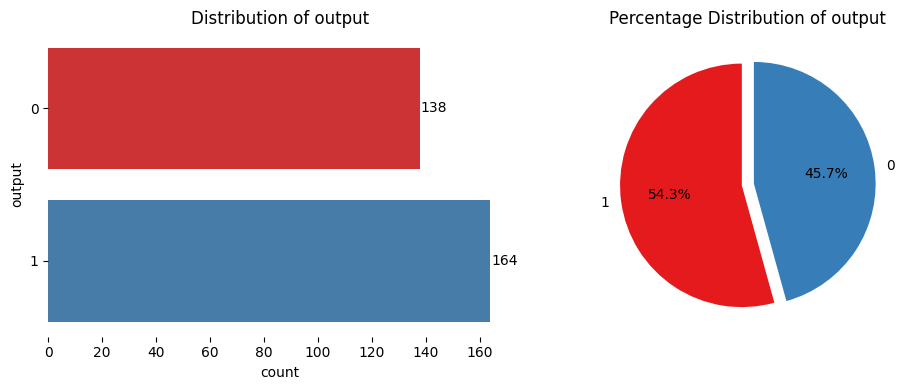

In [12]:
# Target column
target_column = 'output'

# Create visualizations for the target variable
plt.figure(figsize=(10, 4))

# First subplot: Count plot
plt.subplot(1, 2, 1)
sns.countplot(y=target_column, data=df, palette='Set1')
plt.title(f'Distribution of {target_column}')

# Add annotations
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Second subplot: Pie chart
plt.subplot(1, 2, 2)
df[target_column].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('Set1'),
    startangle=90,
    explode=[0.05] * df[target_column].nunique()
)
plt.title(f'Percentage Distribution of {target_column}')
plt.ylabel('')

plt.tight_layout()
plt.show()


### Insights

1. **Prevalence of Heart Attack Risk**:
   - Approximately **54.30%** of the patients in the dataset are classified as having a higher chance of experiencing a heart attack (output = 1).
   - This indicates that just over half of the patients present risk factors that may predispose them to cardiovascular events.

2. **Lower Risk Group**:
   - About **45.70%** of patients are classified as having a lower chance of heart attack (output = 0).
   - This suggests that nearly half of the individuals in this dataset do not exhibit significant risk factors for heart disease.

3. **Imbalance in Risk Distribution**:
   - The distribution between the two classes is relatively balanced, but there is a slight inclination towards a higher number of patients at risk (54.30% vs. 45.70%).
   - This balance is important for modeling, as it allows for meaningful comparisons and predictions without extreme class imbalance.
  
4. **Implications for Healthcare**:
   - The relatively high percentage of patients at risk highlights the need for targeted interventions and monitoring strategies in this population.
   - Healthcare providers can focus on lifestyle modifications, preventive measures, and early interventions for the majority of patients identified as being at risk.


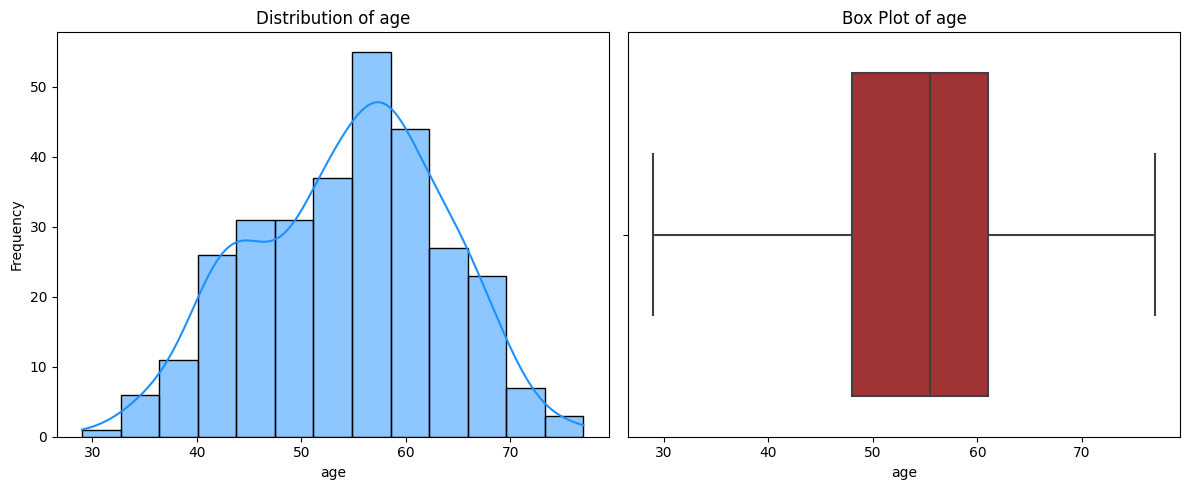

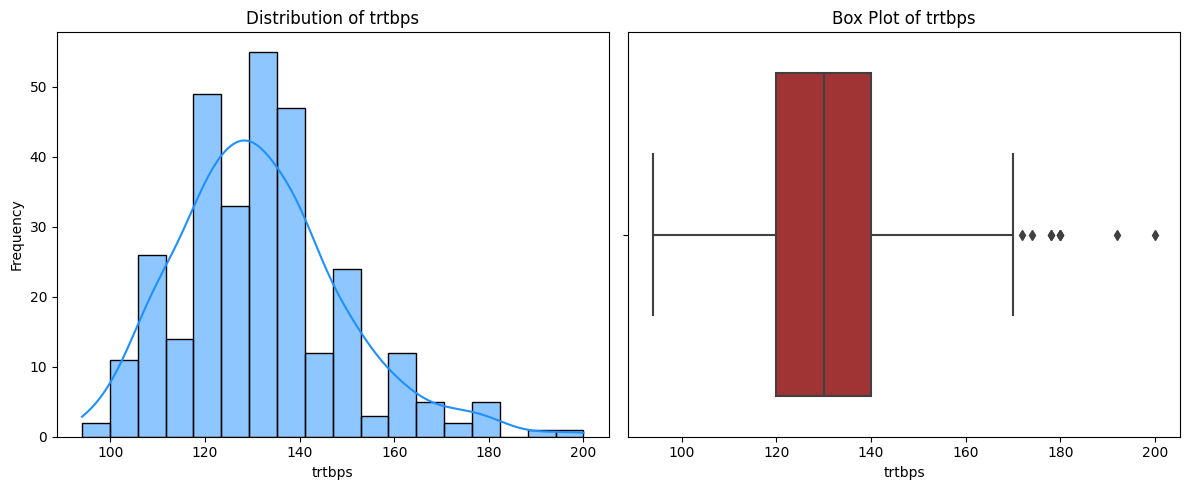

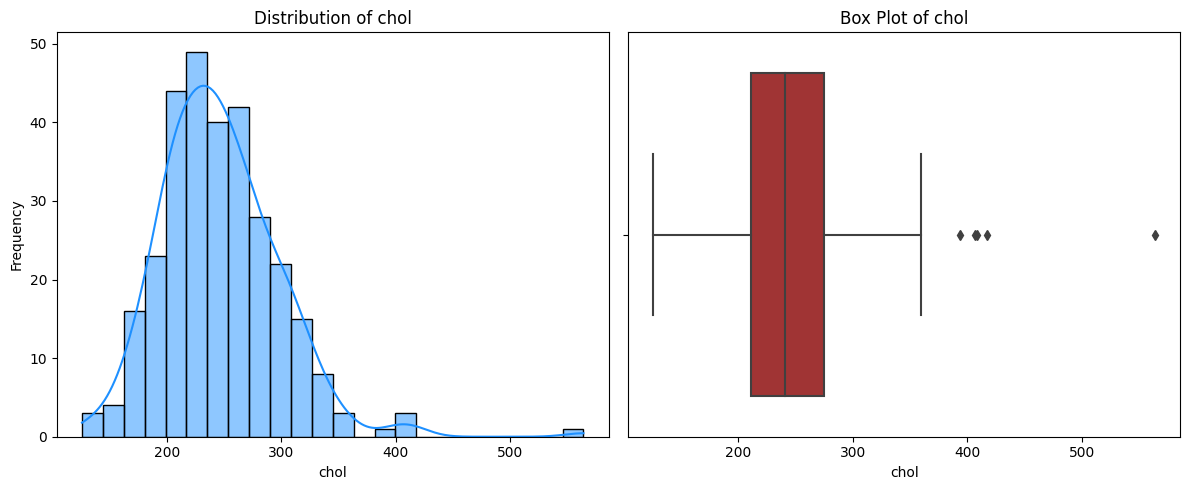

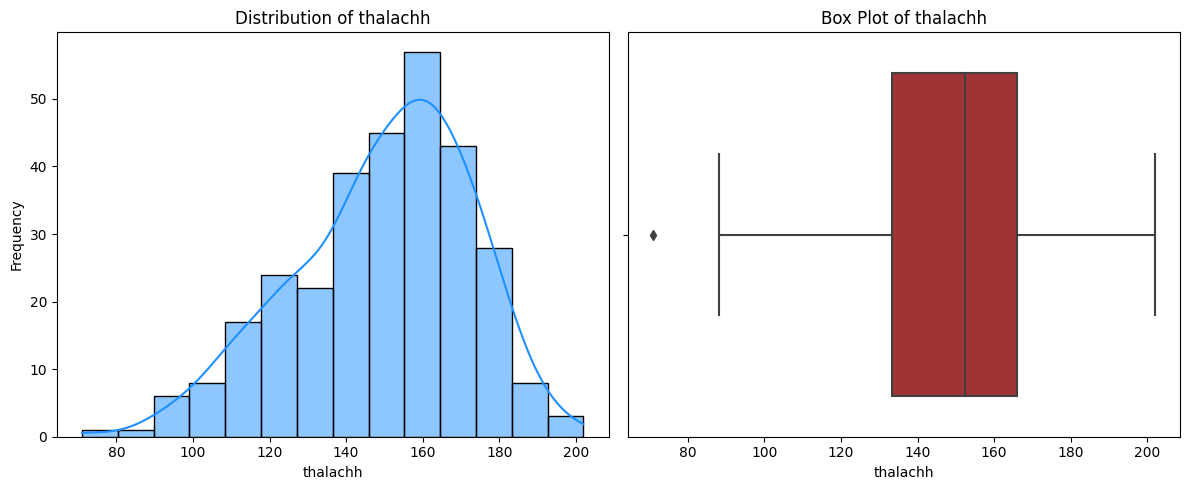

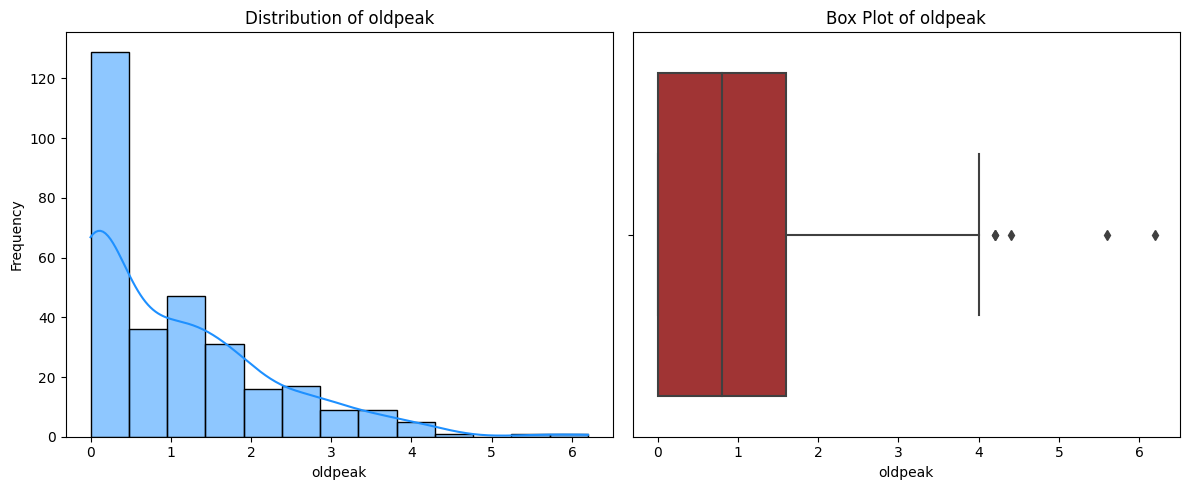

In [13]:
def plot_continuous_distributions(df, columns):
    for column in columns:
        plt.figure(figsize=(12, 5))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True, color="dodgerblue")
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")

        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column], color="firebrick")
        plt.title(f"Box Plot of {column}")
        plt.xlabel(column)

        plt.tight_layout()
        plt.show()

# Apply to continuous columns in the dataset
continuous_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plot_continuous_distributions(df, continuous_columns)


### Insights from Continuous Distributions:

1. **`age` (Age)**:
   - **Histogram**:
     - The age distribution is slightly right-skewed, with most patients in the range of 45–65 years.
   - **Box Plot**:
     - No significant outliers observed.
     - The median age is around 55 years.

2. **`trtbps` (Resting Blood Pressure)**:
   - **Histogram**:
     - The distribution is slightly bell-shaped, centered around 120–140 mm Hg.
   - **Box Plot**:
     - A few potential outliers are present, particularly on the higher end (above 180 mm Hg).

3. **`chol` (Cholesterol)**:
   - **Histogram**:
     - Cholesterol levels are positively skewed, with most patients having levels between 200–300 mg/dl.
   - **Box Plot**:
     - Several outliers are evident, with extreme values above 400 mg/dl.

4. **`thalachh` (Maximum Heart Rate Achieved)**:
   - **Histogram**:
     - The distribution is approximately normal, peaking around 150–170 bpm.
   - **Box Plot**:
     - No significant outliers observed.
     - Indicates a relatively compact range of heart rates.

5. **`oldpeak` (ST Depression)**:
   - **Histogram**:
     - Positively skewed, with most values concentrated around 0–2.
   - **Box Plot**:
     - Some outliers are present, especially for values above 4.

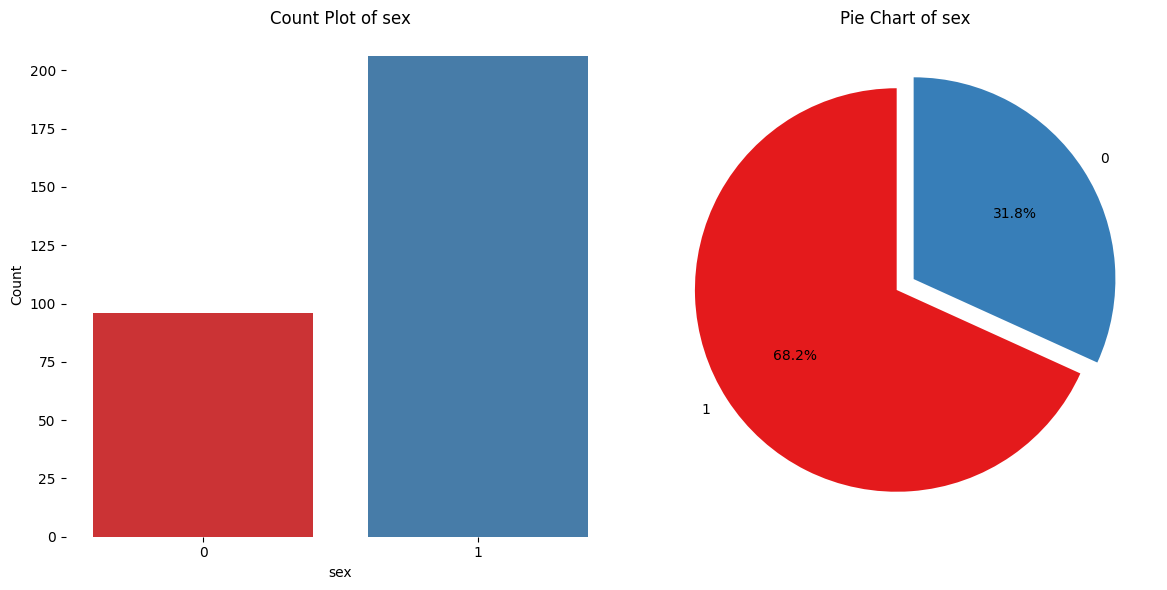

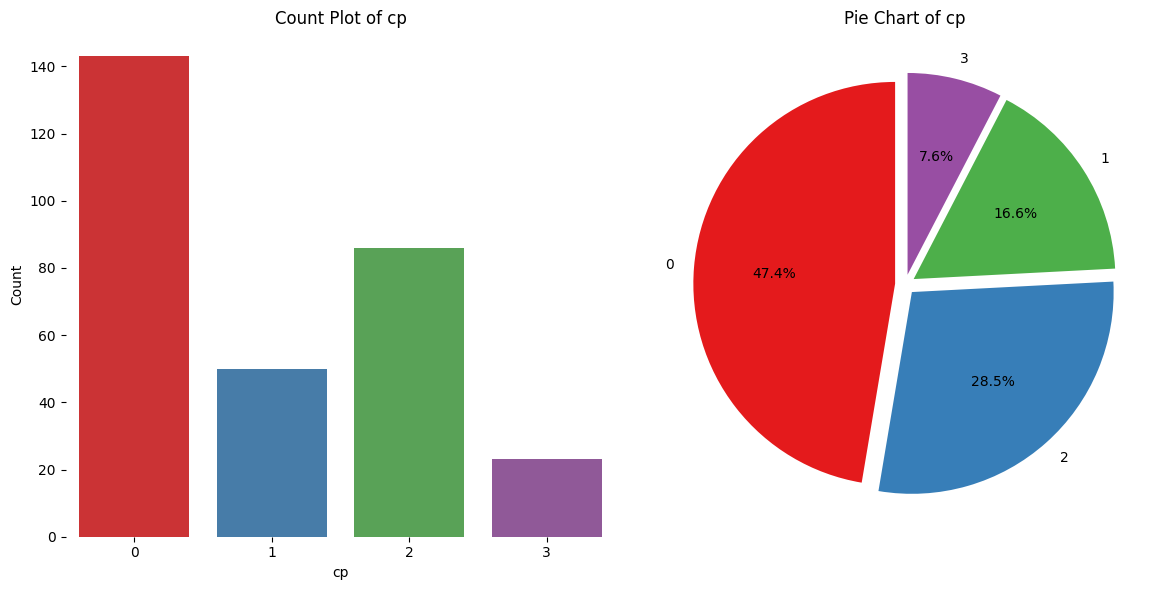

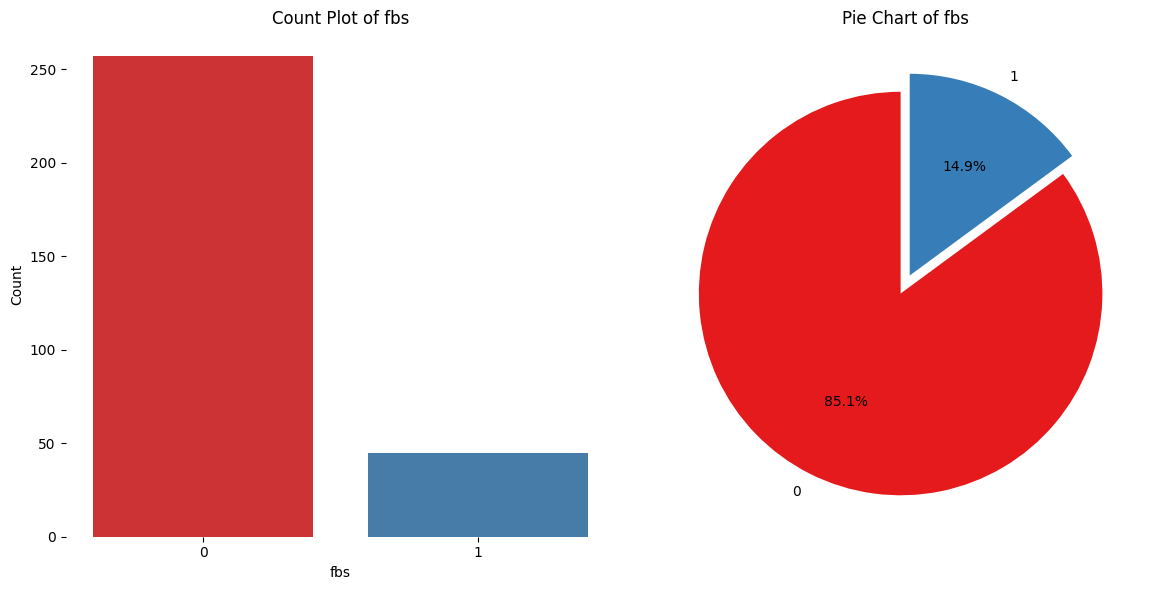

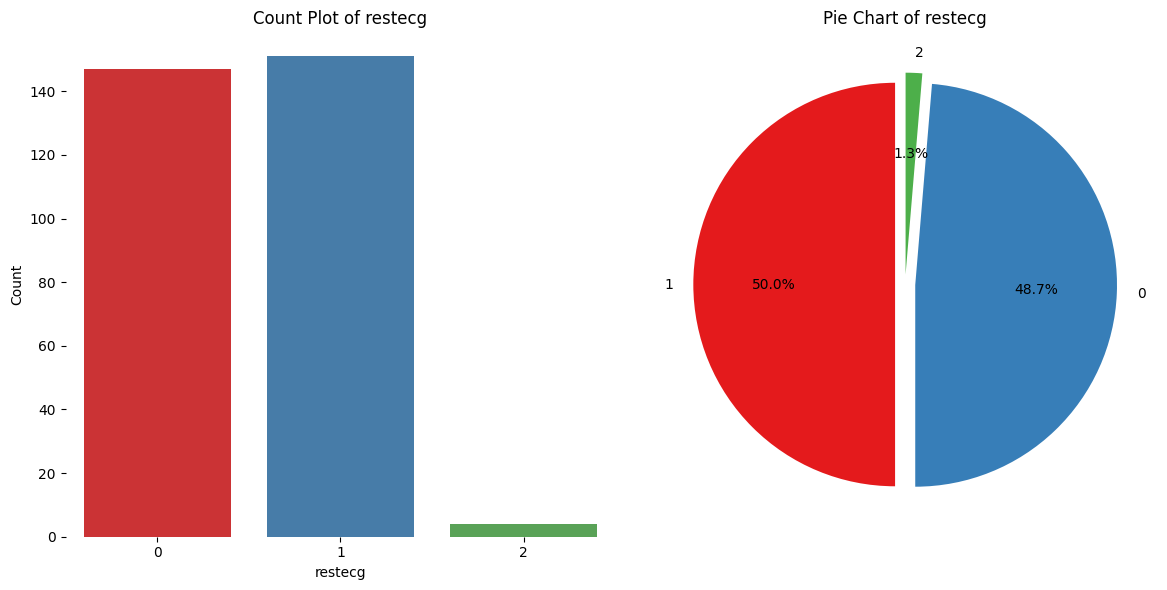

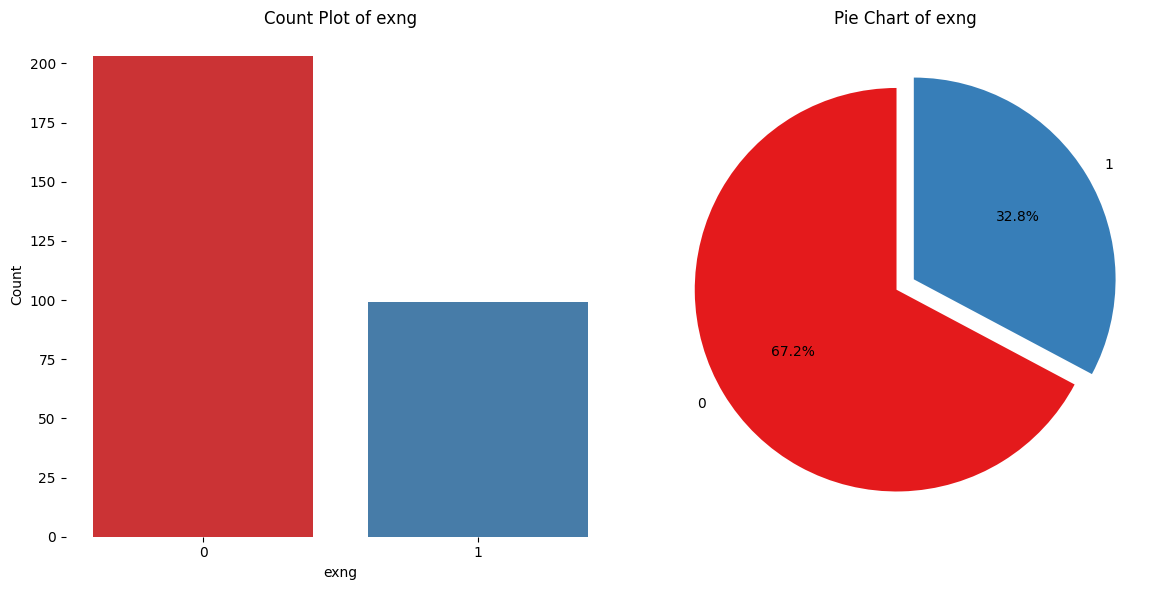

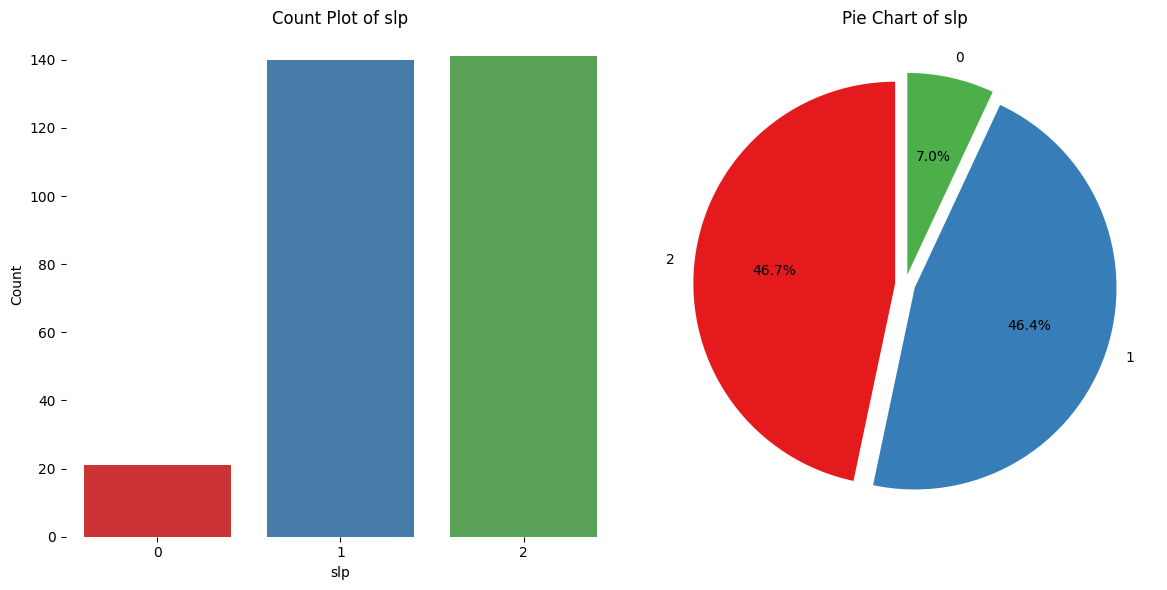

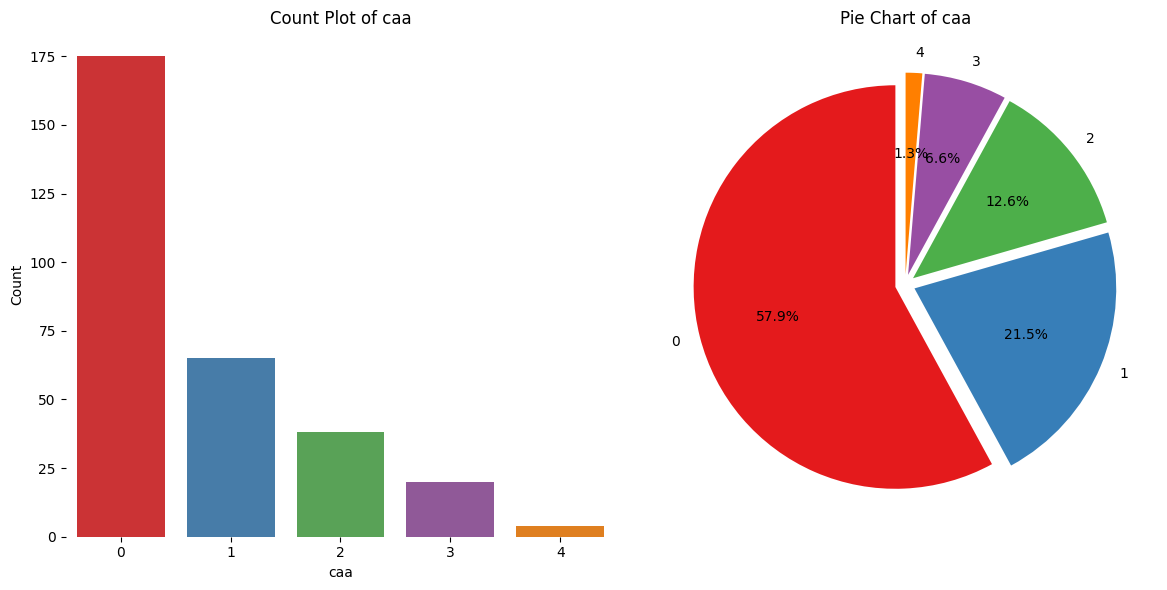

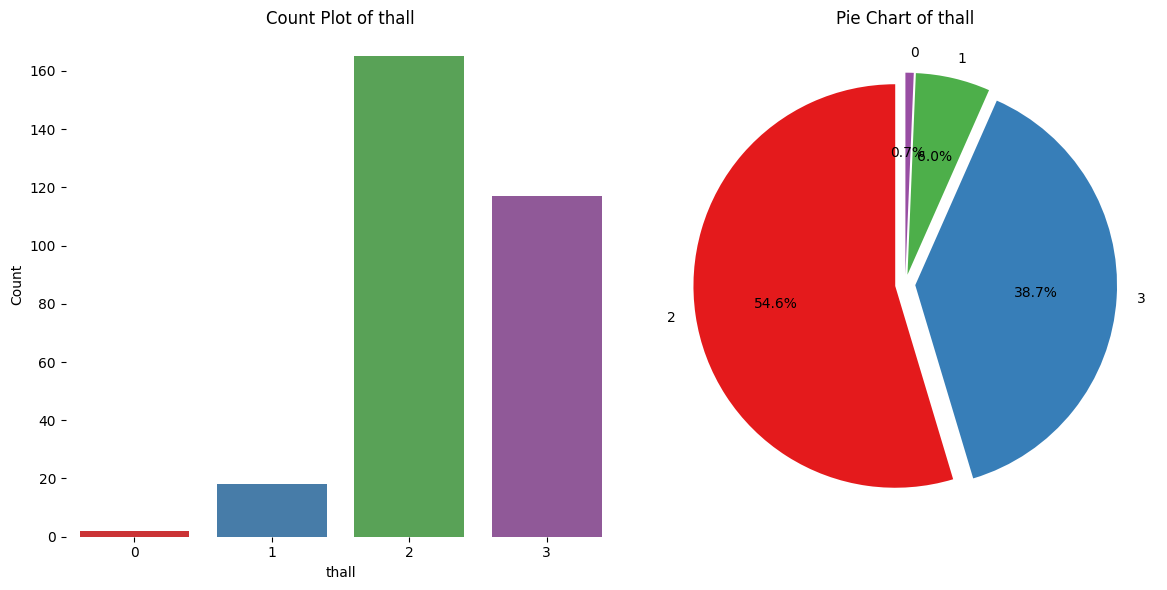

In [14]:
def plot_discrete_distributions(df, columns):
    for column in columns:
        plt.figure(figsize=(12, 6))

        # Count Plot
        plt.subplot(1, 2, 1)
        sns.countplot(x=column, data=df, palette="Set1")
        plt.title(f"Count Plot of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        sns.despine(left=True, bottom=True)

        # Pie Chart
        plt.subplot(1, 2, 2)
        df[column].value_counts().plot.pie(
            autopct='%1.1f%%',
            colors=sns.color_palette('Set1'),
            startangle=90,
            explode=[0.05] * df[column].nunique()
        )
        plt.title(f"Pie Chart of {column}")
        plt.ylabel('')

        plt.tight_layout()
        plt.show()

# Apply to discrete columns
discrete_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
plot_discrete_distributions(df, discrete_columns)


### Insights from Discrete Distributions:

1. **`sex` (Gender)**:
   - The dataset contains more males (`sex=1`) than females (`sex=0`), accounting for approximately 68% of the data.
   - This distribution indicates a gender imbalance, which might influence the outcomes.

2. **`cp` (Chest Pain Type)**:
   - The most common chest pain type is `cp=0` (asymptomatic), followed by `cp=1` (typical angina).
   - Least common is `cp=3` (non-anginal pain), representing a small fraction of the population.

3. **`fbs` (Fasting Blood Sugar)**:
   - A significant majority of patients have `fbs=0` (fasting blood sugar ≤ 120 mg/dl), accounting for ~85%.
   - `fbs=1` (high fasting blood sugar) is relatively rare.

4. **`restecg` (Resting ECG Results)**:
   - Most patients have `restecg=0` (normal), followed by `restecg=1` (ST-T wave abnormality).
   - `restecg=2` (left ventricular hypertrophy) is the least common.

5. **`exng` (Exercise-Induced Angina)**:
   - The majority (~67%) of patients did not experience exercise-induced angina (`exng=0`).
   - `exng=1` (angina) is less frequent.

6. **`slp` (Slope of Peak Exercise ST Segment)**:
   - Most patients have `slp=2` (upsloping), while `slp=0` (flat slope) and `slp=1` (downsloping) are less common.

7. **`caa` (Number of Major Vessels)**:
   - `caa=0` (no major vessel disease) is the most common, representing a majority of the population.
   - Higher values of `caa` (e.g., `caa=3` or `caa=4`) are rare.

8. **`thall` (Thalassemia)**:
   - `thall=2` (fixed defect) is the most common, followed by `thall=3` (normal).
   - `thall=0` and `thall=1` are relatively less frequent.

<Figure size 1000x600 with 0 Axes>

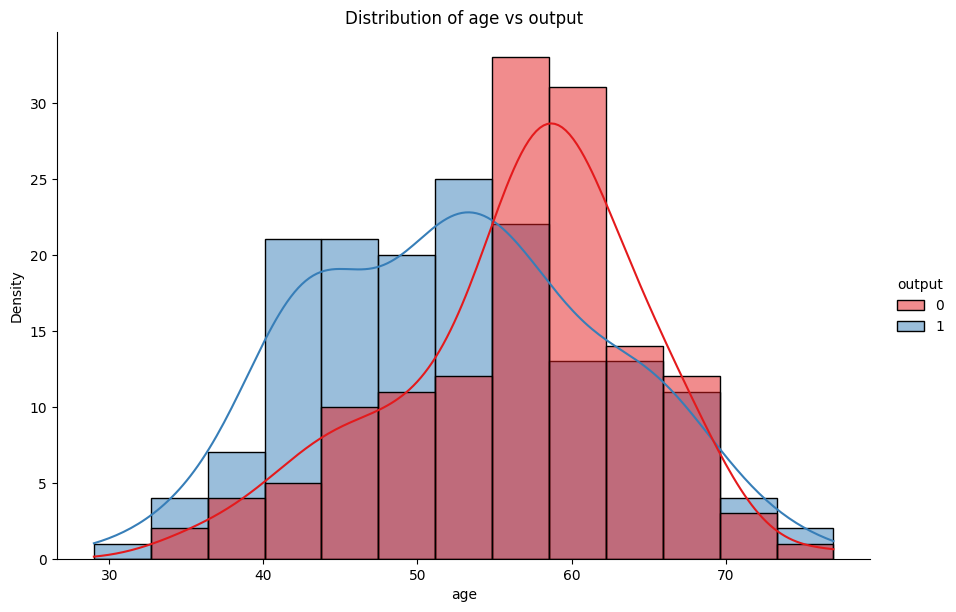

<Figure size 1000x600 with 0 Axes>

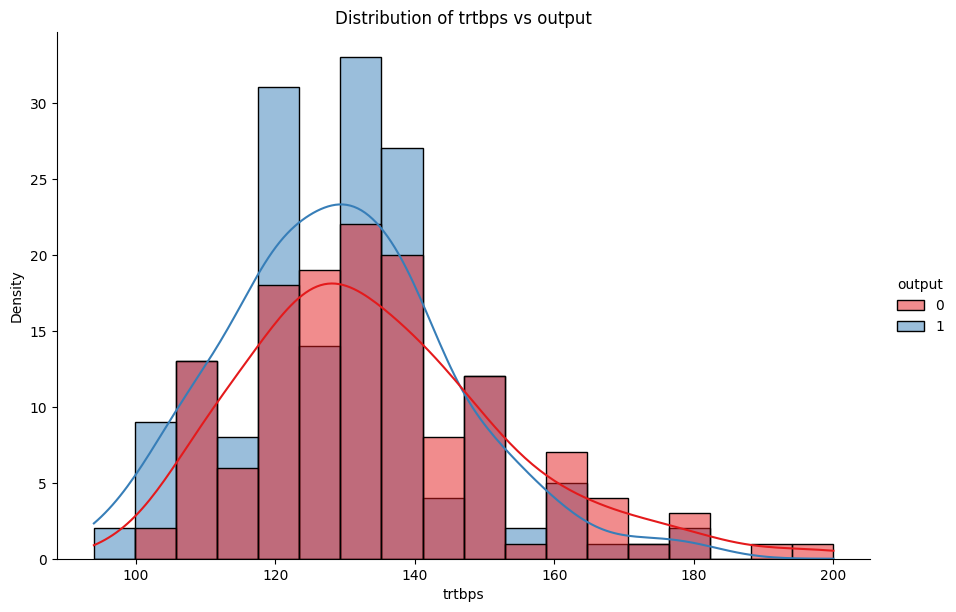

<Figure size 1000x600 with 0 Axes>

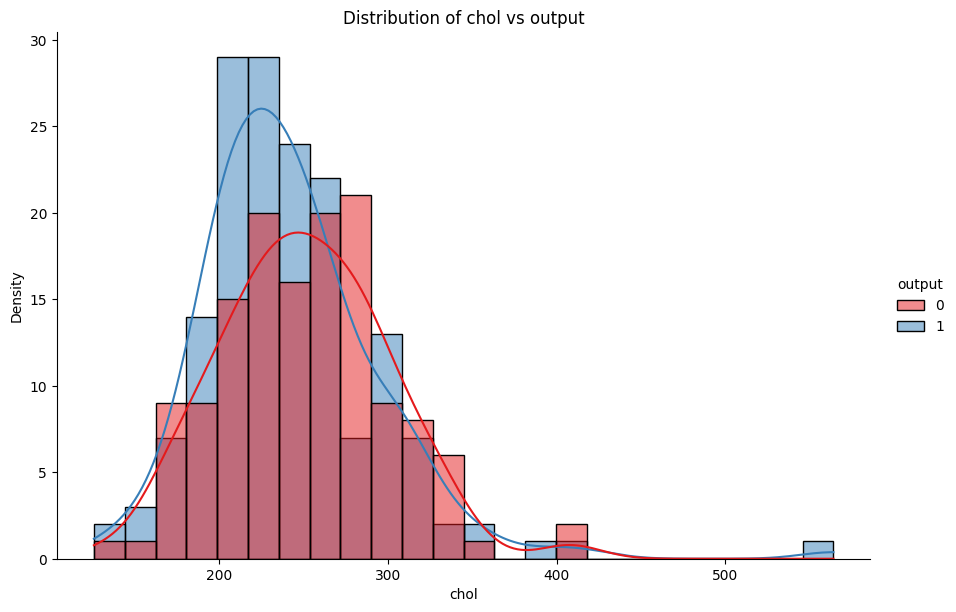

<Figure size 1000x600 with 0 Axes>

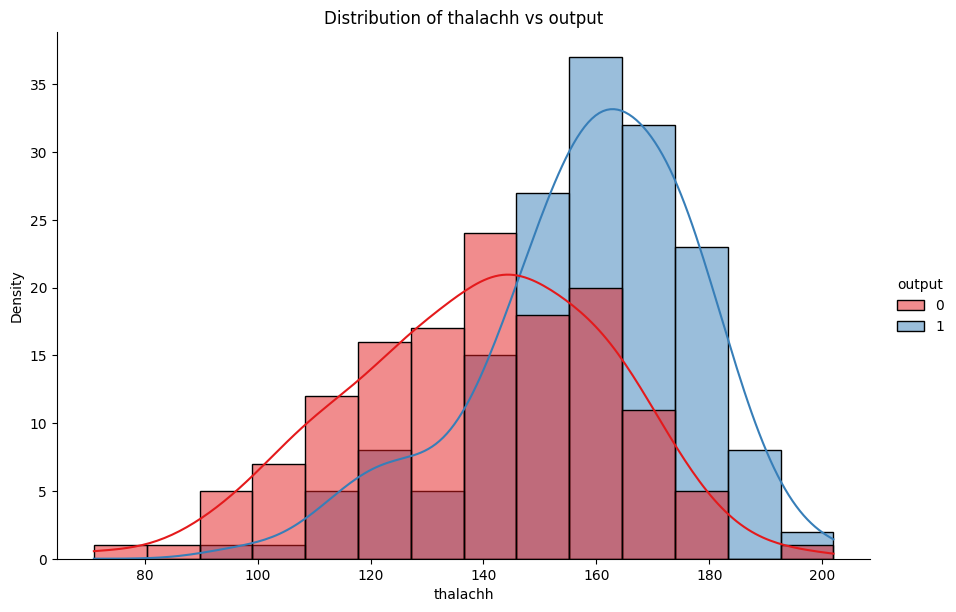

<Figure size 1000x600 with 0 Axes>

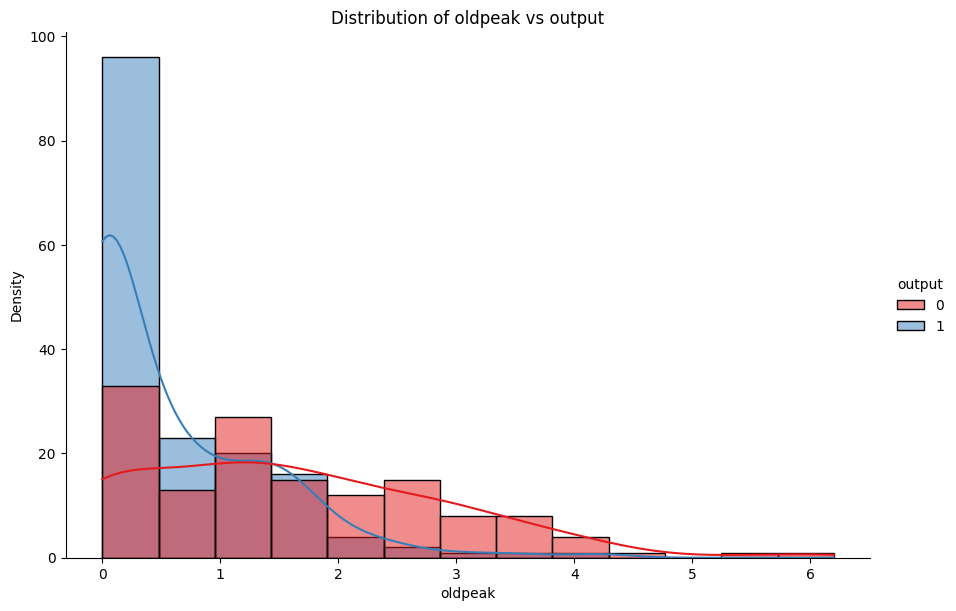

In [15]:
def plot_continuous_vs_target(df, continuous_columns, target_column):
    for column in continuous_columns:
        plt.figure(figsize=(10, 6))
        sns.displot(data=df, x=column, hue=target_column, kind='hist', kde=True, height=6, aspect=1.5, palette="Set1")
        plt.title(f"Distribution of {column} vs {target_column}")
        plt.xlabel(column)
        plt.ylabel("Density")
        plt.show()

# Example Usage: Continuous columns vs target
plot_continuous_vs_target(df, ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'], 'output')


### Insights from the Continuous Variables vs Target (output):

1. **`age` vs `output`**:
   - The age distributions are somewhat overlapping for both target classes.
   - Higher density for patients with more chances of a heart attack (`output = 1`) appears around the age range of 50–60.

2. **`trtbps` (Resting Blood Pressure) vs `output`**:
   - Similar overlapping distributions for both target classes.
   - A slightly higher density of `output = 1` cases in the range of 120–140 mm Hg.

3. **`chol` (Cholesterol) vs `output`**:
   - The cholesterol levels overlap considerably for both target classes.
   - A slight increase in density for `output = 1` is seen around 200–300 mg/dl.

4. **`thalachh` (Maximum Heart Rate Achieved) vs `output`**:
   - Clear distinction between the classes.
   - Patients with more chance of a heart attack (`output = 1`) tend to have higher heart rates, with a peak around 150–170 bpm.

5. **`oldpeak` (ST Depression) vs `output`**:
   - Clear separation between the classes.
   - Patients with a higher chance of a heart attack (`output = 1`) tend to have higher `oldpeak` values, with density peaks around 1–2.

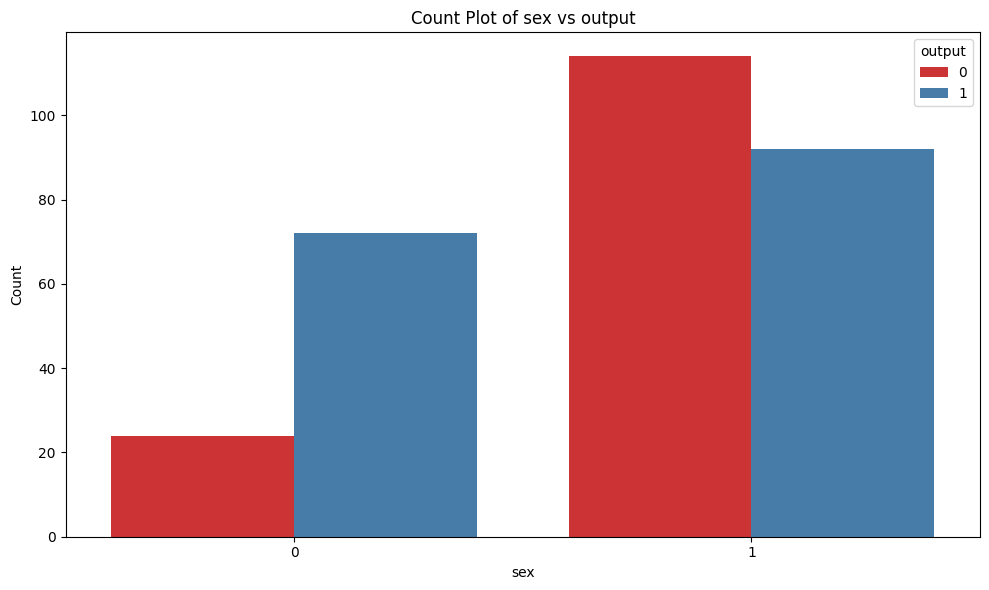

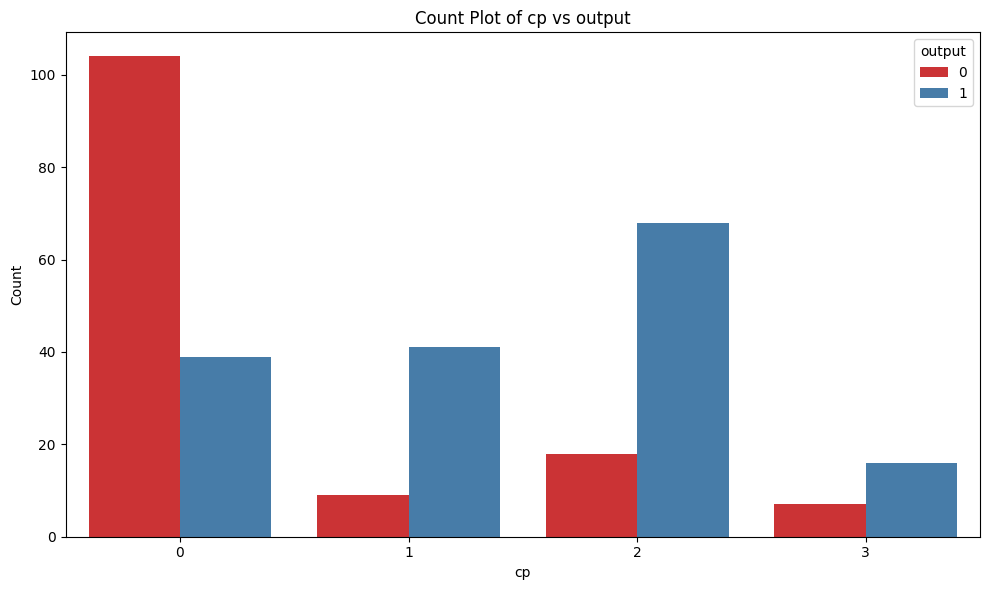

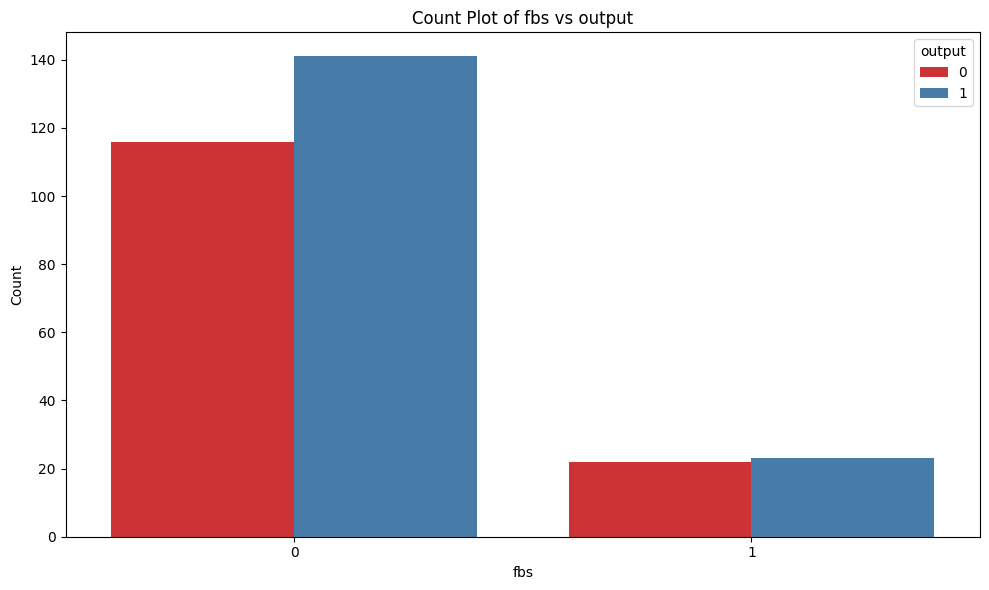

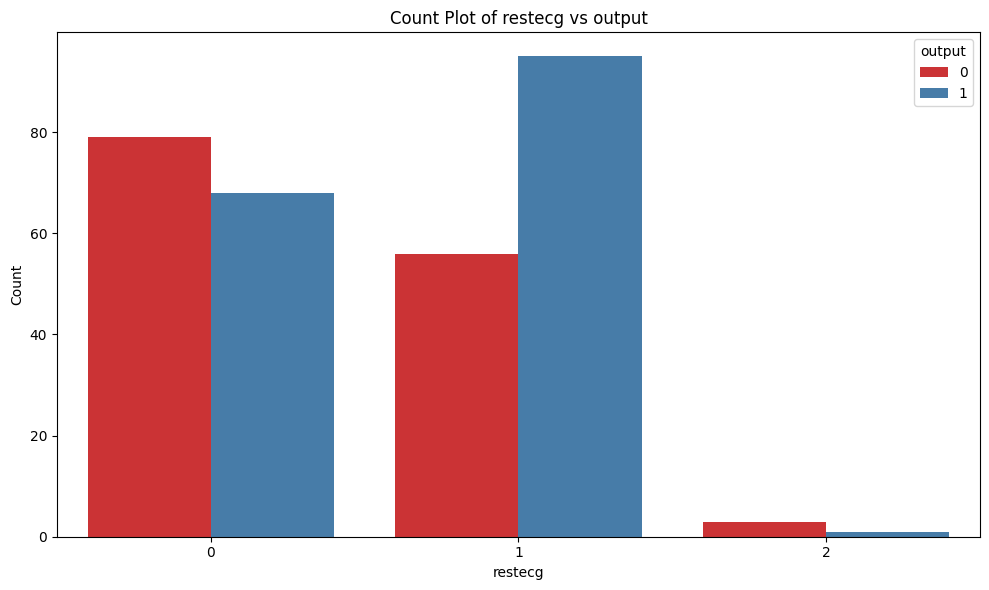

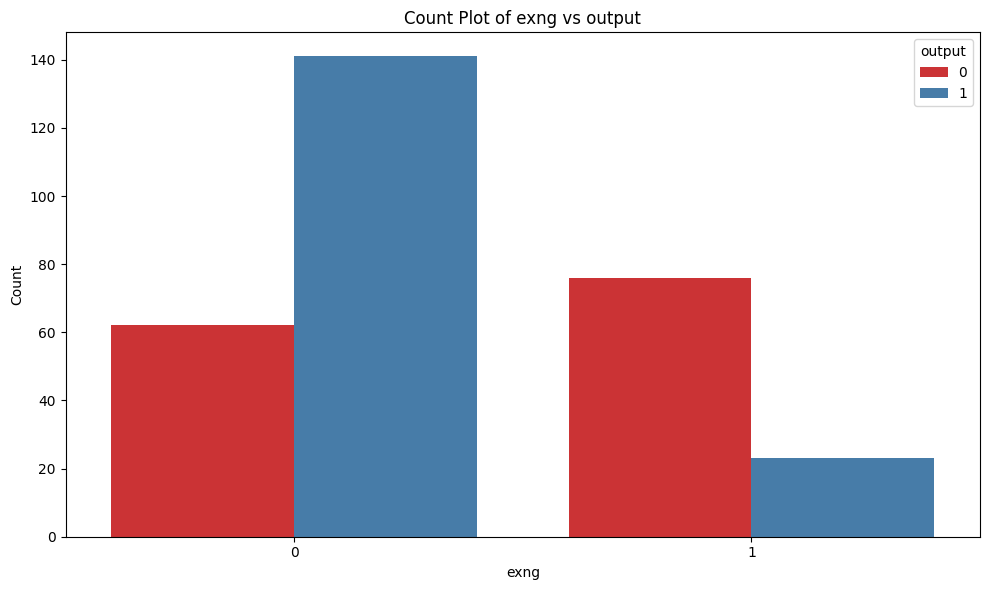

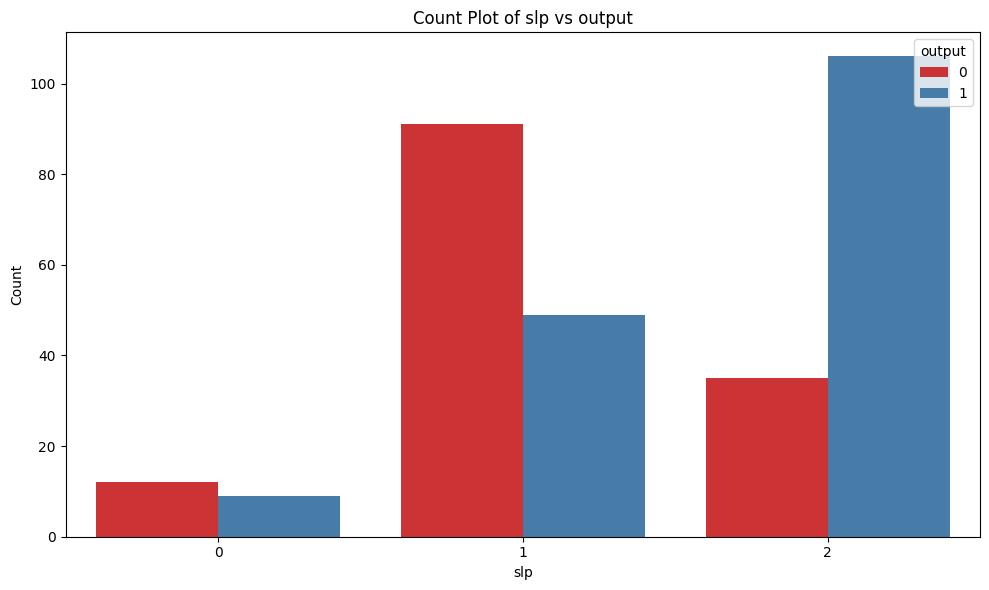

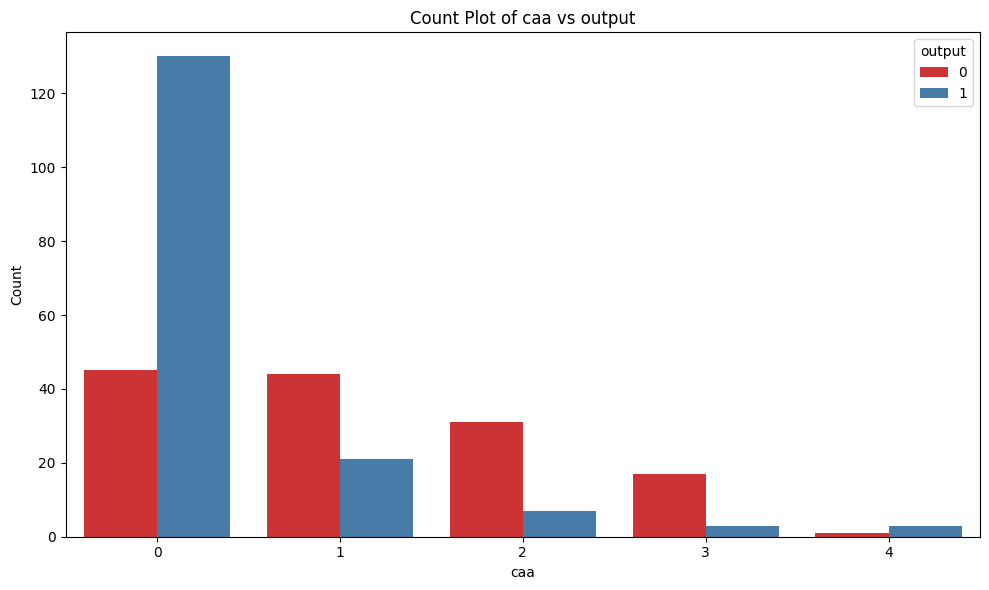

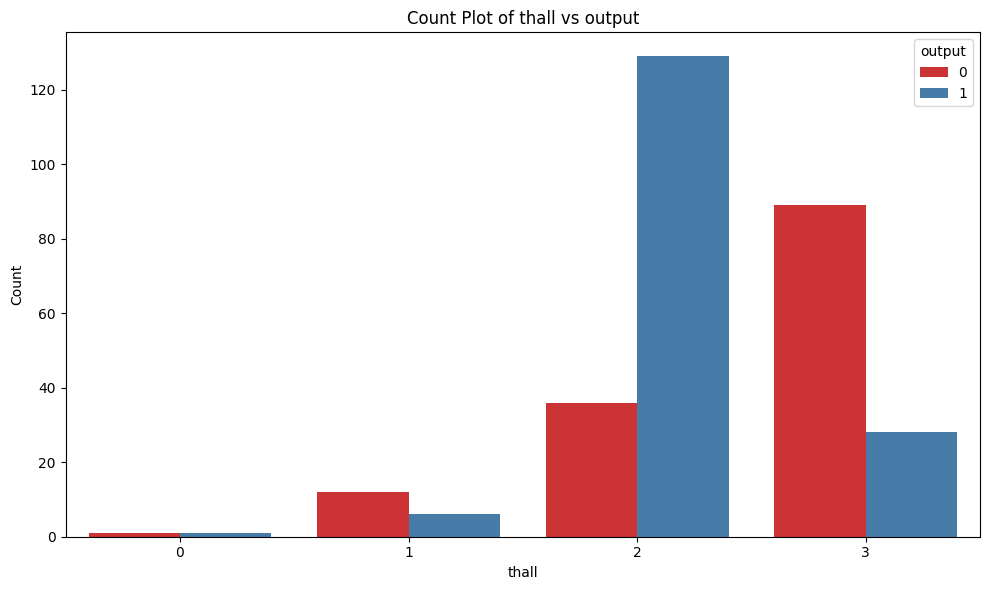

In [16]:
def plot_discrete_vs_target(df, discrete_columns, target_column):
    for column in discrete_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue=target_column, data=df, palette="Set1")
        plt.title(f"Count Plot of {column} vs {target_column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.legend(title=target_column, loc="upper right")
        plt.tight_layout()
        plt.show()

# Example Usage: Discrete columns vs target
plot_discrete_vs_target(df, ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'], 'output')


### Insights from the Discrete Variables vs Target (output):

1. **`sex` (Gender)**:
   - Males (`sex=1`) have a higher count of both `output=0` (less chance of heart attack) and `output=1` (more chance of heart attack).
   - Females (`sex=0`) have a lower count overall but show a similar distribution for both target classes.

2. **`cp` (Chest Pain Type)**:
   - Patients with `cp=1` (typical angina) and `cp=2` (atypical angina) are more likely to have `output=1` (more chance of heart attack).
   - `cp=0` (asymptomatic) is more evenly distributed across both target classes.

3. **`fbs` (Fasting Blood Sugar)**:
   - Most patients have `fbs=0` (fasting blood sugar ≤ 120 mg/dl) regardless of `output`.
   - Higher fasting blood sugar (`fbs=1`) is slightly more associated with `output=1`.

4. **`restecg` (Resting ECG)**:
   - `restecg=1` (ST-T wave abnormality) and `restecg=2` (left ventricular hypertrophy) are more associated with `output=1`.
   - `restecg=0` (normal) has a balanced distribution.

5. **`exng` (Exercise-Induced Angina)**:
   - `exng=0` (no angina) is significantly more associated with `output=1`.
   - `exng=1` (angina) is more associated with `output=0`.

6. **`slp` (Slope of Peak ST Segment)**:
   - `slp=2` (upsloping) is more associated with `output=1`.
   - `slp=0` (flat slope) and `slp=1` (downsloping) show more balanced distributions across both target classes.

7. **`caa` (Number of Major Vessels)**:
   - `caa=0` (no major vessel disease) is strongly associated with `output=1`.
   - Higher values (`caa=2, 3, 4`) are more associated with `output=0`.

8. **`thall` (Thalassemia)**:
   - `thall=2` and `thall=3` (fixed defect and normal, respectively) are more associated with `output=1`.
   - `thall=1` (reversible defect) is more evenly distributed.

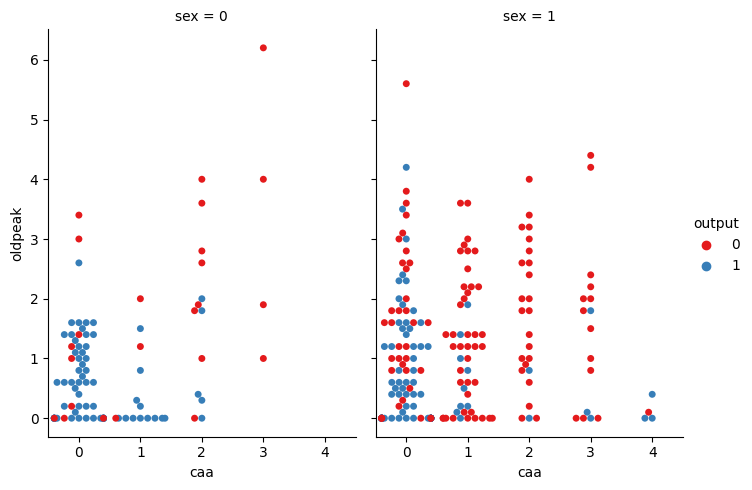

In [17]:
sns.catplot(
    data=df, x="caa", y="oldpeak", hue="output", kind="swarm", col="sex", aspect=.7, palette="Set1"
)

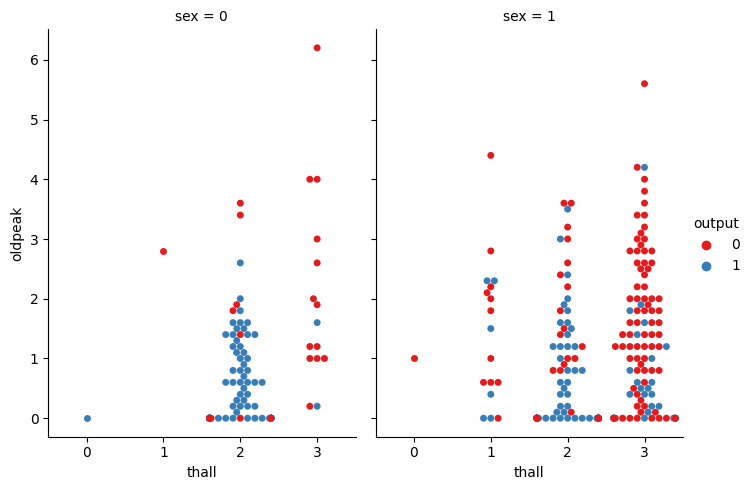

In [18]:
sns.catplot(
    data=df, x="thall", y="oldpeak", hue="output", kind="swarm", col="sex", aspect=.7, palette="Set1"
)

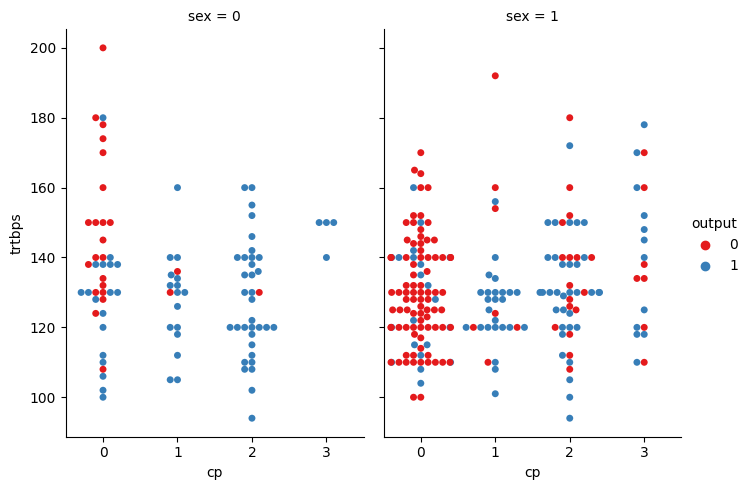

In [19]:
sns.catplot(
    data=df, x="cp", y="trtbps", hue="output", kind="swarm", col="sex", aspect=.7, palette="Set1"
)

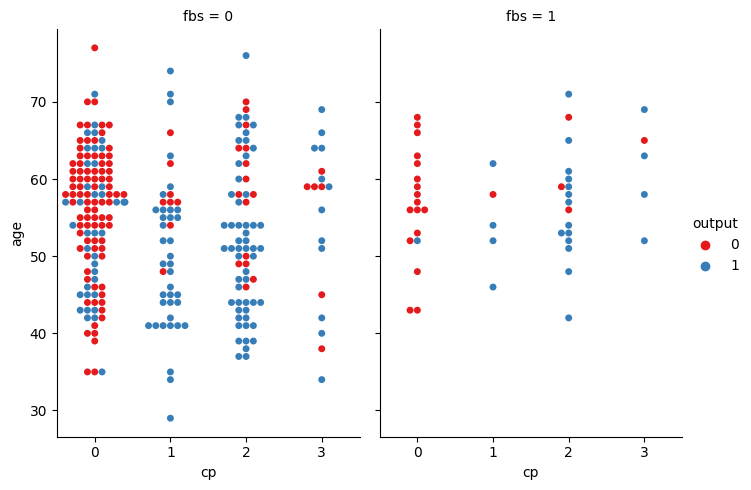

In [20]:
sns.catplot(
    data=df, x="cp", y="age", hue="output", kind="swarm", col="fbs", aspect=.7, palette="Set1"
)

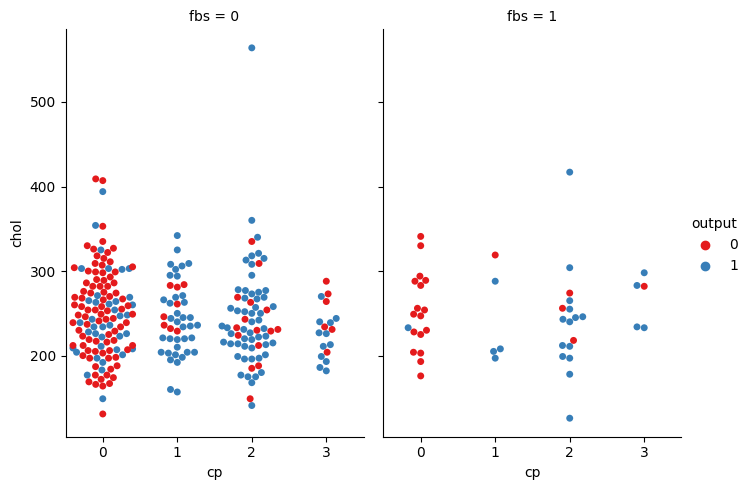

In [21]:
sns.catplot(
    data=df, x="cp", y="chol", hue="output", kind="swarm", col="fbs", aspect=.7, palette="Set1"
)

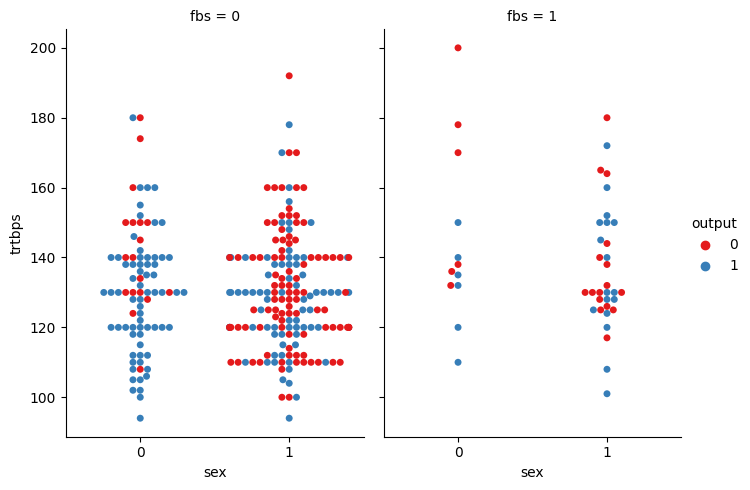

In [22]:
sns.catplot(
    data=df, x="sex", y="trtbps", hue="output", kind="swarm", col="fbs", aspect=.7, palette="Set1"
)

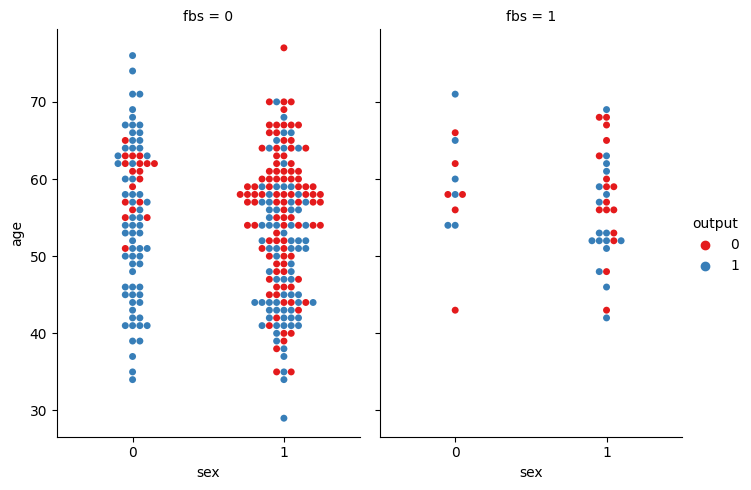

In [23]:
sns.catplot(
    data=df, x="sex", y="age", hue="output", kind="swarm", col="fbs", aspect=.7, palette="Set1"
)

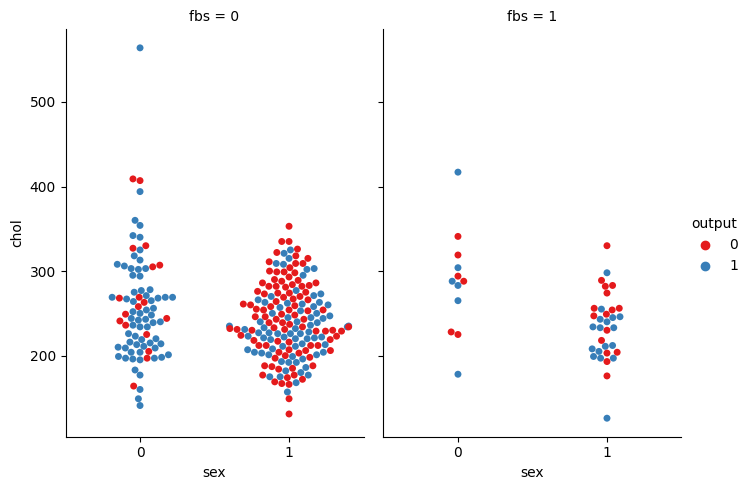

In [24]:
sns.catplot(
    data=df, x="sex", y="chol", hue="output", kind="swarm", col="fbs", aspect=.7, palette="Set1"
)

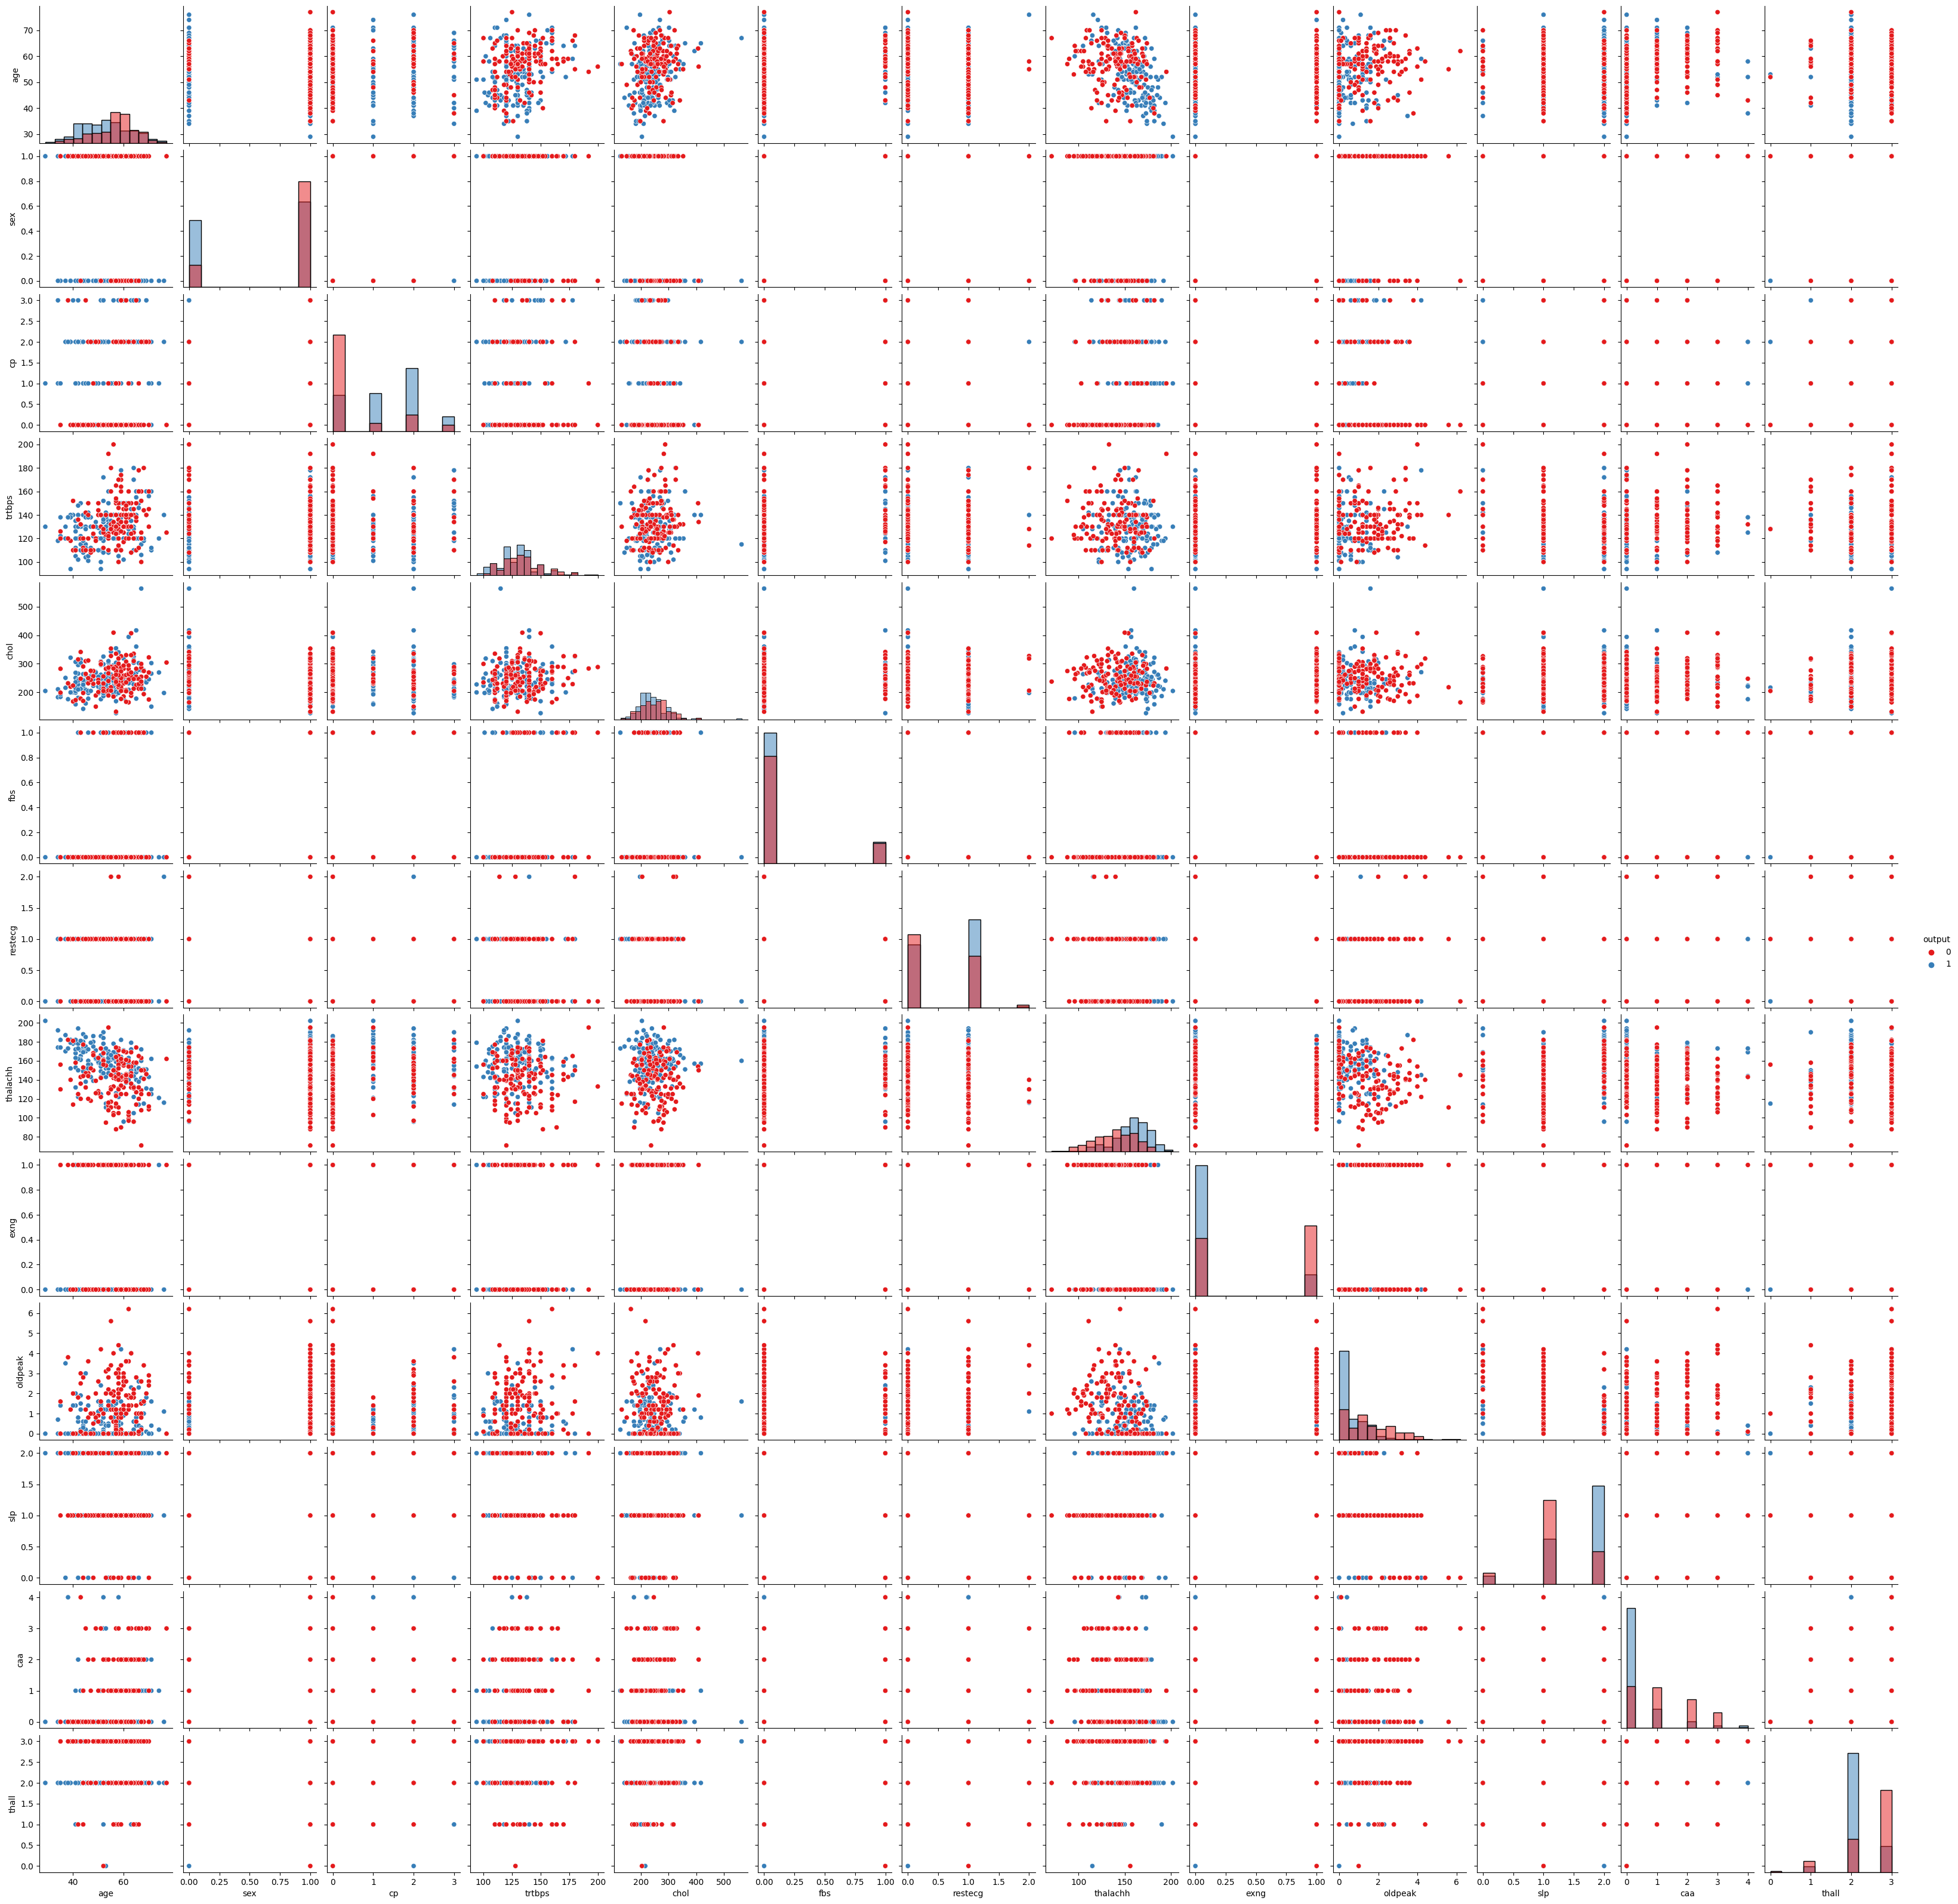

In [25]:
sns.pairplot(df, hue="output", diag_kind="hist", palette="Set1")

# <span style="color:transparent;">Skewness and Kurtosis</span>

<div style="border-radius: 15px; border: 2px solid #ff4500; padding: 20px; background: linear-gradient(135deg, #ff7f50, #ff6347, #dc143c); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        Skewness and Kurtosis
    </h1>
</div>

In [26]:
# Define the continuous columns
continuous_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Calculate skewness and kurtosis for the specified continuous columns
skewness = df[continuous_columns].skew()
kurtosis = df[continuous_columns].kurt()

# Display results
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 age        -0.203743
trtbps      0.716541
chol        1.147332
thalachh   -0.532671
oldpeak     1.266173
dtype: float64

Kurtosis:
 age        -0.527512
trtbps      0.922996
chol        4.542591
thalachh   -0.062186
oldpeak     1.567876
dtype: float64


### Observational Insights

1. **Age**:
   - **Skewness**: **-0.20**
     - The negative skewness indicates that the age distribution is slightly left-skewed, meaning there are more younger individuals in the dataset, with fewer older individuals.
   - **Kurtosis**: **-0.53**
     - The negative kurtosis suggests a platykurtic distribution, indicating a flatter shape with lighter tails compared to a normal distribution. This means there are fewer extreme age values (outliers) present in the dataset.

2. **Resting Blood Pressure (trtbps)**:
   - **Skewness**: **0.72**
     - The positive skewness indicates that the resting blood pressure distribution is right-skewed, suggesting that there are more individuals with lower blood pressure readings and a tail extending towards higher values.
   - **Kurtosis**: **0.92**
     - The kurtosis value is less than 3, indicating a platykurtic distribution. This suggests that the distribution of resting blood pressure is relatively flat and has fewer outliers compared to a normal distribution.

3. **Cholesterol Levels (chol)**:
   - **Skewness**: **1.15**
     - The positive skewness indicates a significant right skew, suggesting that most individuals have lower cholesterol levels, but there are some individuals with very high cholesterol levels contributing to the tail on the right.
   - **Kurtosis**: **4.54**
     - The high kurtosis value indicates a leptokurtic distribution, meaning there are heavy tails and a sharper peak compared to a normal distribution. This suggests that while most cholesterol levels are moderate, there are significant outliers with very high cholesterol levels.

4. **Maximum Heart Rate Achieved (thalachh)**:
   - **Skewness**: **-0.53**
     - The negative skewness indicates that the maximum heart rate distribution is left-skewed, suggesting that there are more individuals with higher heart rates and fewer individuals with very low heart rates.
   - **Kurtosis**: **-0.06**
     - The kurtosis value close to 0 indicates a platykurtic distribution, suggesting a flatter shape with fewer extreme values compared to a normal distribution.

5. **Oldpeak**:
   - **Skewness**: **1.27**
     - The positive skewness indicates that oldpeak values (which measure ST depression induced by exercise) are right-skewed, meaning most patients have lower oldpeak values with some patients showing significantly higher values.
   - **Kurtosis**: **1.57**
     - The kurtosis value suggests a platykurtic distribution, indicating fewer outliers and a flatter peak compared to a normal distribution.


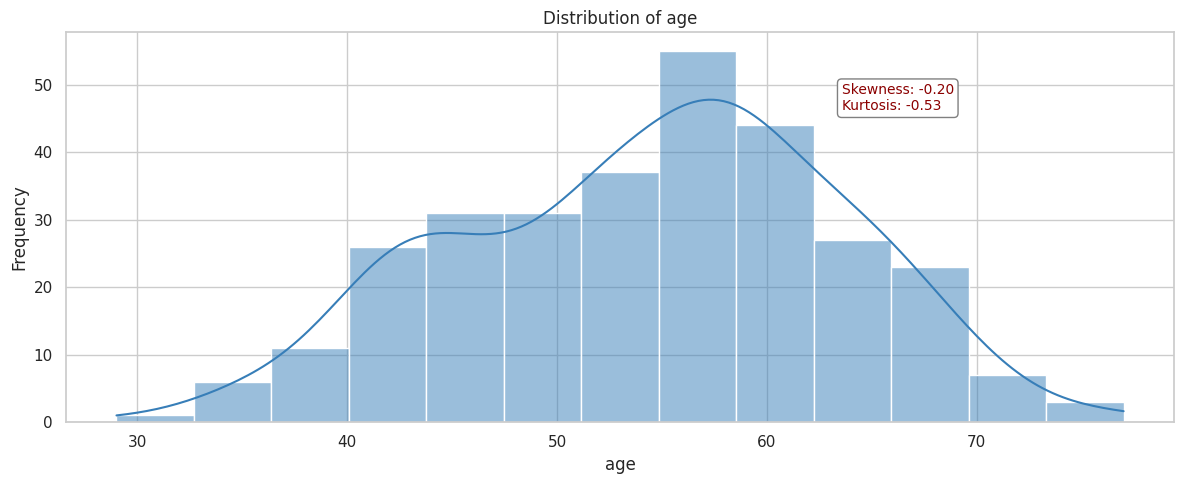

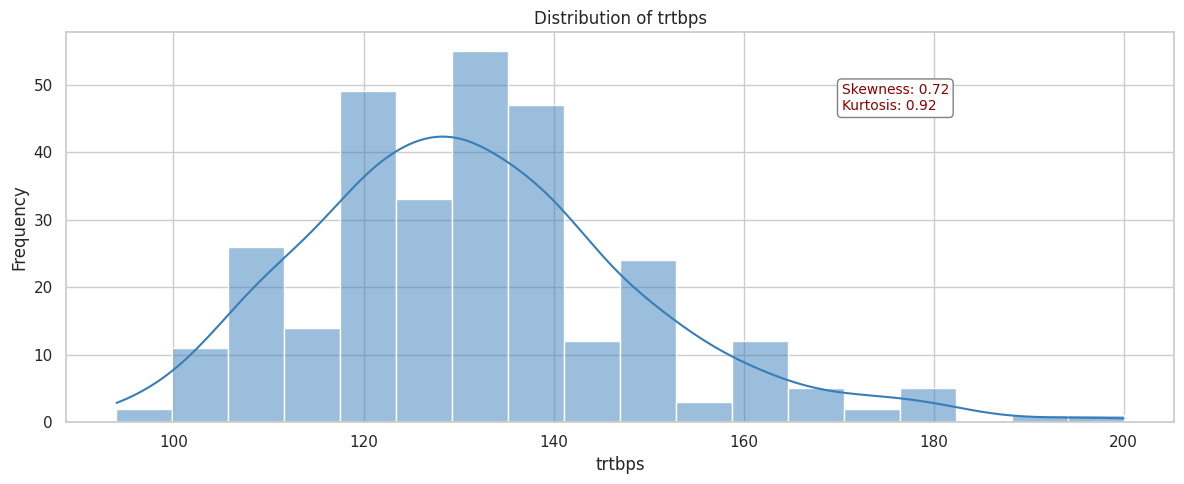

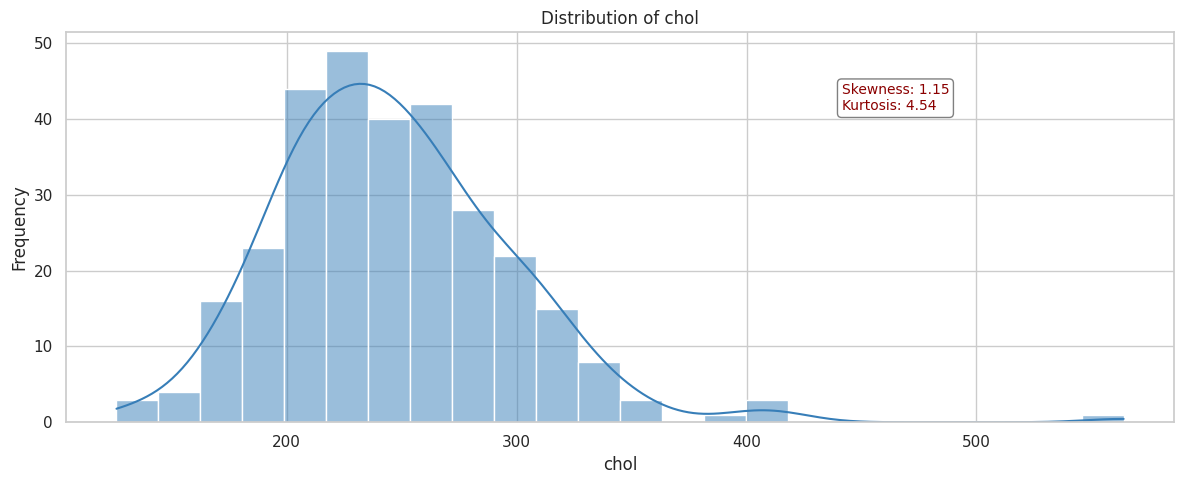

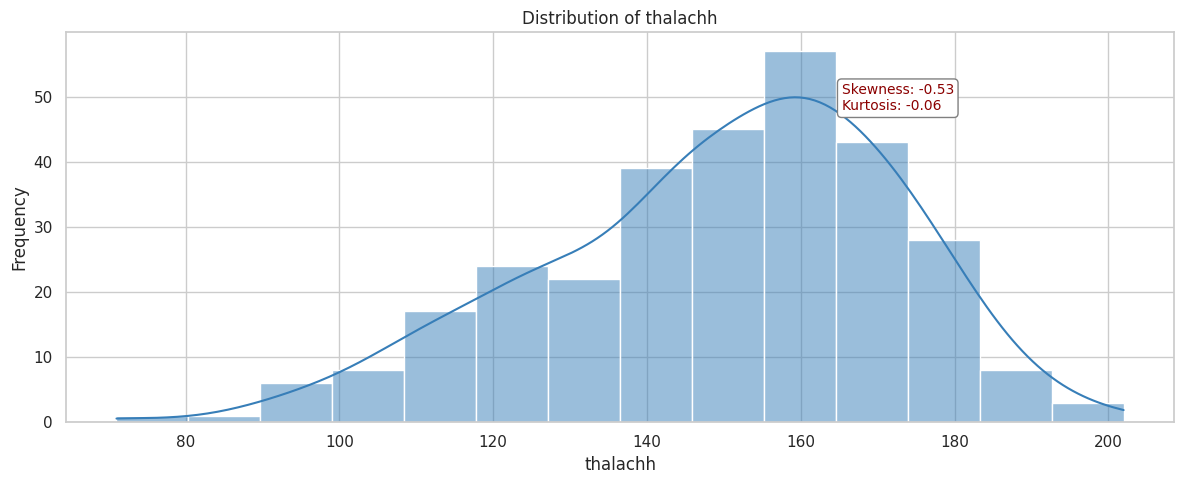

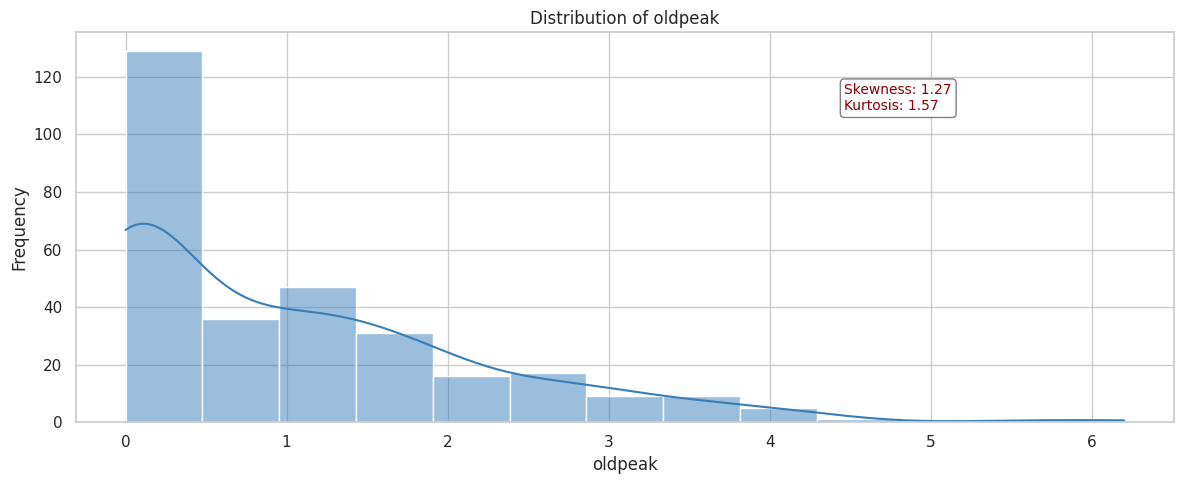

In [27]:
def visualize_skewness_kurtosis(df, columns):
    for column in columns:
        sns.set(style="whitegrid")
        plt.figure(figsize=(12, 5))

        sns.histplot(df[column], kde=True, color="#377eb8")
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")

        skewness = df[column].skew()
        kurtosis = df[column].kurt()
        plt.annotate(
            f"Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}",
            xy=(0.7, 0.8),
            xycoords="axes fraction",
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white"),
            fontsize=10,
            color="darkred",
        )

        plt.tight_layout()
        plt.show()

continuous_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
visualize_skewness_kurtosis(df, continuous_columns)

# <span style="color:transparent;">Correlation Heatmaps</span>

<div style="border-radius: 15px; border: 2px solid #ff4500; padding: 20px; background: linear-gradient(135deg, #ff7f50, #ff6347, #dc143c); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        Correlation Heatmaps
    </h1>
</div>

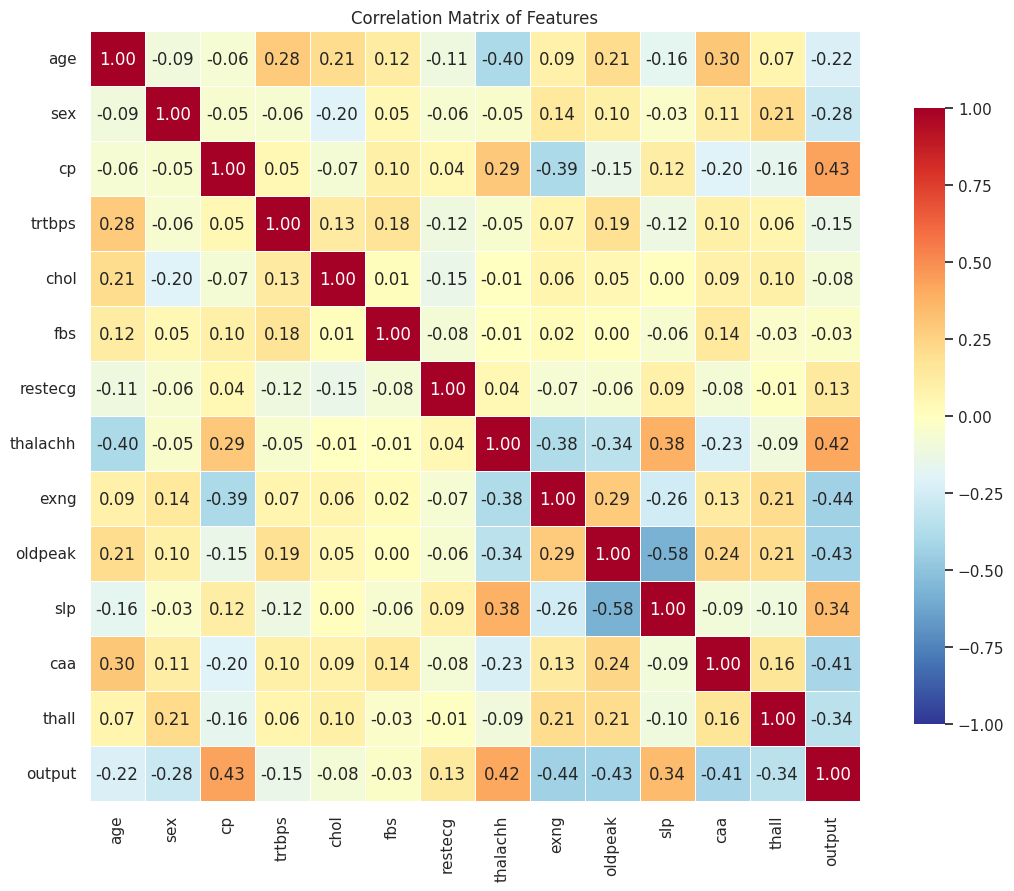

In [28]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdYlBu_r",
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5
)
plt.title("Correlation Matrix of Features")
plt.show()


### Observations from the Correlation Matrix:

1. **Highly Correlated Features**:
   - `cp` (Chest Pain Type) and `output` (target) have a strong positive correlation, suggesting that chest pain type is a key predictor of heart attack likelihood.
   - `thalachh` (Maximum Heart Rate Achieved) also shows a positive correlation with `output`, making it another significant predictor.

2. **Negative Correlations with Target**:
   - `exng` (Exercise-Induced Angina) and `caa` (Number of Major Vessels) have negative correlations with `output`, indicating that these features are inversely related to the likelihood of a heart attack.

3. **Feature Relationships**:
   - `oldpeak` (ST Depression) is negatively correlated with `thalachh` (Maximum Heart Rate Achieved) and positively correlated with `exng` (Exercise-Induced Angina).
   - `caa` (Number of Major Vessels) has a moderate positive correlation with `oldpeak`.

4. **Low or No Correlation**:
   - Some features, such as `fbs` (Fasting Blood Sugar), show little to no correlation with the target variable or other features, suggesting they might have limited predictive power.

# <span style="color:transparent;">Data Preprocessing</span>

<div style="border-radius: 15px; border: 2px solid #ff4500; padding: 20px; background: linear-gradient(135deg, #ff7f50, #ff6347, #dc143c); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        Data Preprocessing
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

In [30]:
def handle_skewness_kurtosis(df, columns):
    transformed_columns = {}
    
    for column in columns:
        skewness = df[column].skew()
        
        # Log transformation for positive skewness
        if skewness > 0.5:
            df[f'{column}_log'] = np.log1p(df[column])  # log1p handles log(0) by using log(1+x)
            transformed_columns[column] = f'{column}_log'
        
        # Square root transformation for moderate positive skewness
        elif 0 < skewness <= 0.5:
            df[f'{column}_sqrt'] = np.sqrt(df[column])
            transformed_columns[column] = f'{column}_sqrt'
        
        # Box-Cox transformation for non-negative values
        elif skewness < -0.5:
            df[f'{column}_boxcox'], _ = stats.boxcox(df[column] + 1)  # Adding 1 to ensure positivity
            transformed_columns[column] = f'{column}_boxcox'
        
        # No transformation needed for near-normal distributions
        else:
            transformed_columns[column] = column  # Keep original if no transformation is applied

    return df, transformed_columns

continuous_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
df_transformed, transformed_cols = handle_skewness_kurtosis(df, continuous_columns)

# Display the transformed DataFrame and the mapping of original to transformed columns
print("Transformed DataFrame:\n", df_transformed[transformed_cols.values()])
print("\nTransformed Columns Mapping:\n", transformed_cols)

Transformed DataFrame:
      age  trtbps_log  chol_log  thalachh_boxcox  oldpeak_log
0     63    4.983607  5.455321     33231.876350     1.193922
1     37    4.875197  5.525453     54240.788865     1.504077
2     41    4.875197  5.323010     45040.220314     0.875469
3     56    4.795791  5.468060     48607.183802     0.587787
4     57    4.795791  5.872118     39969.919807     0.470004
..   ...         ...       ...              ...          ...
298   57    4.948760  5.488938     21394.397677     0.182322
299   45    4.709530  5.579730     25022.170411     0.788457
300   68    4.976734  5.267858     28966.357345     1.481605
301   57    4.875197  4.882802     18431.161628     0.788457
302   57    4.875197  5.468060     46212.523924     0.000000

[302 rows x 5 columns]

Transformed Columns Mapping:
 {'age': 'age', 'trtbps': 'trtbps_log', 'chol': 'chol_log', 'thalachh': 'thalachh_boxcox', 'oldpeak': 'oldpeak_log'}


### Summary of Transformations

The transformations have been successfully applied based on the skewness of each variable:

- **Log Transformations**: Applied to `trtbps`, `chol`, and `oldpeak` to address right skewness.
- **Box-Cox Transformation**: Applied to `thalachh` to manage left skewness.
- **No Transformation Needed**: The `age` variable remained unchanged due to its near-normal distribution.

In [31]:
# List of original columns to drop
original_columns_to_drop = ['trtbps', 'chol', 'thalachh', 'oldpeak']

# Drop original columns from DataFrame
df_transformed.drop(columns=original_columns_to_drop, inplace=True)

# Display updated DataFrame
print("Updated DataFrame after dropping original columns:\n", df_transformed.head())

Updated DataFrame after dropping original columns:
    age  sex  cp  fbs  restecg  exng  slp  caa  thall  output  trtbps_log  \
0   63    1   3    1        0     0    0    0      1       1    4.983607   
1   37    1   2    0        1     0    0    0      2       1    4.875197   
2   41    0   1    0        0     0    2    0      2       1    4.875197   
3   56    1   1    0        1     0    2    0      2       1    4.795791   
4   57    0   0    0        1     1    2    0      2       1    4.795791   

   chol_log  thalachh_boxcox  oldpeak_log  
0  5.455321     33231.876350     1.193922  
1  5.525453     54240.788865     1.504077  
2  5.323010     45040.220314     0.875469  
3  5.468060     48607.183802     0.587787  
4  5.872118     39969.919807     0.470004  


<div style="border-radius: 15px; border: 2px solid #ff4500; padding: 20px; background: linear-gradient(135deg, #ff7f50, #ff6347, #dc143c); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="blue: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        And you Continue !!
    </h1>
    <p style="color: skyblue; font-size: 18px; text-align: center;">
        EDA is an endless ocean. Depends on researcher's view.
    </p>
    <p style="color: skyblue; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">